# <h1 align="center">AI and Machine Learning Project</h1>

Group ID: 15

Members:

* Nikol Tushaj
* Rajla Çulli
* Giulio Carbone

# Aeropolis

In the futuristic city of Aeropolis, autonomous delivery drones are essential to ensure fast and efficient delivery of goods across the sprawling metropolis. Each drone's performance is evaluated based on how much cargo it can deliver per flight. However, many factors influence its performance, from weather conditions to the type of terrain it navigates. To optimize drone performance, data scientists are tasjed with predicting the cargo capacity per flight based on various environmental and operational factors.

### Dataset Features

* <b>Cargo_Capacity_kg:</b> The amount of cargo the drone can carry in kilograms per flight.
* <b>Air_Temperature_Celsius:</b> The air temperature during the drone's flight, measured in Celsius.
* <b>Weather_Status:</b> The current weather conditions during the drone's operation.
* <b>Package_Type:</b> The type of package or cargo the drone is delivering.
* <b>Vertical_Landing:</b> Indicates if the drone uses vertical landing capability.
* <b>Equipment_Cost:</b> The cost of the drone equipment.
* <b>Market_Region:</b> The geographical market where the drone operates.
* <b>Flight_Duration_Minutes:</b> The total duration of the flight, measured in minutes.
* <b>Terrain_Type:</b> The type of terrain over which the drone flies
* <b>Water_Usage_liters:</b> The amount of water used by the drone during the flight, liters.
* <b>Flight_Hours:</b> The cumulative flight hours logged by the drone.
* <b>Delivery_Time_Minutes:</b> The total time taken for the drone to complete the delivery
* <b>Cleaning_Liquid_Usage_liters:</b> The amount of cleaning liquid used by the drone for maintenance.
* <b>Climate_Zone:</b> The climate zone in which the drone is operating.
* <b>Quantum_Battery:</b> Indicates if the drone uses a quantum-powered battery.
* <b>Flight_Zone:</b> The operational zone where the drone conducts its flights.
* <b>Autopilot_Quality_Index:</b> A rating of the autopilot system's performance.
* <b>Vertical_Max_Speed:</b> The maximum vertical speed the drone can achieve.
* <b>Wind_Speed_kmph:</b> The wind speed during the drone's flight, measured in kilometers per hour.
* <b>Route_Optimization_Per_Second:</b> The number of route optimizations performed per second by the drone's navigation system.

### Assignment

* Perform an Explanatory data analysis (EDA) with visualization.
* Define whether this is a regression, classification or clustering problem, explain why and choose your model design accordingly. Test at least 3 different models. First, create a validation set from the training set to analyze the behaviour with the default hyperparameters. Then use cross-validation to find the best set of hyperparameters. You must describe every hyperparameter tuned(the more, the better).
* Preprocess the dataset (remove outliers, impute missing values, encode categorical features, not necessarily in this order).
* Generate a training and test set, if needed. The test set should be used only at the end.
* Select the best model using the right metric.
* Compute the performances of the test set if applicable.
* Make a comparison of the different models.
* Write the report, a.k.a "README.md".

## Importing Libraries

In [593]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Reading the input file

In [594]:
aeropolis_df = pd.read_csv('aeropolis.csv')

## 1. EDA

### 1.1 Data Overview

Here we preview the first few rows of the dataset using the **`.head()`** function. It helps in understanding the structure of the data, the column names, and a quick look at the values

In [595]:
aeropolis_df.head()

Cargo_Capacity_kg  Air_Temperature_Celsius Weather_Status Package_Type  \
0           4.270384                32.241410         Cloudy        Maize   
1           5.120852                24.635445          Sunny       Cotton   
2           2.976017                16.292566         Cloudy       Barley   
3           4.990381                      NaN          Sunny      Soybean   
4           2.938318                21.689674            NaN      Soybean   

  Vertical_Landing  Equipment_Cost  Market_Region Flight_Duration_Minutes  \
0        Supported        36563.84          Local                   False   
1        Supported        29156.29          Local                   False   
2          Unknown        10909.55  International                   False   
3              NaN        48315.38  International                    True   
4          Unknown        49506.24          Local                   False   

  Terrain_Type  Water_Usage_liters  Flight_Hours  Delivery_Time_Minutes  \
0          NaN             5831.79         164.0                  112.0   
1        Sandy                 NaN         160.0                    NaN   
2        Sandy             4797.87         127.0                   93.0   
3         Clay             7764.89         160.0                   80.0   
4         Clay             4979.04         136.0                   93.0   

   Cleaning_Liquid_Usage_liters Climate_Zone Quantum_Battery Flight_Zone  \
0                         86.49         Arid           False        East   
1                         15.13         Arid            True        East   
2                         25.76    Temperate           False       North   
3                        165.06        Polar            True        West   
4                         55.70    Temperate           False       North   

   Autopilot_Quality_Index  Vertical_Max_Speed  Wind_Speed_kmph  \
0                     0.39               412.0       756.205234   
1                     0.90               207.0       618.345249   
2                     0.54                 NaN       548.243396   
3                     0.10               354.0       447.768700   
4                     0.73               346.0       342.361072   

   Route_Optimization_Per_Second  
0                         651.62  
1                        1102.33  
2                         975.97  
3                         924.49  
4                         909.98

The **`shape`** attribute is used to get the dimenions of the dataset. Here, **`.shape[0]`** gives the total number of rows, and **`.shape[1]`** gives the total number of columns. Printing these values helps verify the dataset's size before processing.

In [596]:
print(f"Number of rows: {aeropolis_df.shape[0]}")
print(f"Number of columns: {aeropolis_df.shape[1]}")

Number of rows: 1000000
Number of columns: 20


The **`.info()`** method is used to get a concise summary of a DataFrame. It provides essential information, such as the number of rows, columns, data types of each column, and the count of non-null values for each column.

This result highlights the fact that each column has missing data and that the data types are either **`float64`** or **`object`**.

In [597]:
aeropolis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Cargo_Capacity_kg              899767 non-null  float64
 1   Air_Temperature_Celsius        900236 non-null  float64
 2   Weather_Status                 899826 non-null  object 
 3   Package_Type                   899579 non-null  object 
 4   Vertical_Landing               900434 non-null  object 
 5   Equipment_Cost                 900197 non-null  float64
 6   Market_Region                  899887 non-null  object 
 7   Flight_Duration_Minutes        900047 non-null  object 
 8   Terrain_Type                   900329 non-null  object 
 9   Water_Usage_liters             900344 non-null  float64
 10  Flight_Hours                   900273 non-null  float64
 11  Delivery_Time_Minutes          900036 non-null  float64
 12  Cleaning_Liquid_Usage_liters 

### 1.2 Checking for Duplicates

The **`.nunique()`** method calculates the number of unique values in each column of the DataFrame. This helps us understand the distribution and variability of the data in each feature. 

From the result we can see that there are some attributes that have a low number of unique values, which may indicate that they are categorical values, and we can see the other attributes that have a high number of unique values, which may indicate that they are numerical values.

In [598]:
aeropolis_df.nunique()

Cargo_Capacity_kg                899767
Air_Temperature_Celsius          900236
Weather_Status                        3
Package_Type                          6
Vertical_Landing                      3
Equipment_Cost                   805687
Market_Region                         3
Flight_Duration_Minutes               2
Terrain_Type                          6
Water_Usage_liters               457347
Flight_Hours                        116
Delivery_Time_Minutes                90
Cleaning_Liquid_Usage_liters      28879
Climate_Zone                          4
Quantum_Battery                       2
Flight_Zone                           4
Autopilot_Quality_Index             101
Vertical_Max_Speed                  400
Wind_Speed_kmph                  900212
Route_Optimization_Per_Second    103624
dtype: int64

Here we ensure the dataset is free from redundancy, which could bias the analysis or training process.

In [599]:
aeropolis_df.duplicated().sum()

0

### 1.3 Checking Data Integrity

To check data integrity in a more detailed way we created the function **`missing_values_table`** to return the total count of missing values for each column and their respective percentage relative to the number of rows.

In [600]:
def missing_values_table(df):
    missing_value = df.isnull().sum()
    missing_value_percent = 100 * missing_value / len(df)

    missing_values_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_values_table = missing_values_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})

    missing_values_table = missing_values_table.sort_values('% of Total Values', ascending=False)

    print(f"The dataframe has {df.shape[1]} columns.")
    print(f"There are {missing_values_table.shape[0]} columns that have missing values.")

    return missing_values_table

The tables shows that the dataset has significant missing values with circa 10% in each column

In [601]:
missing_values_table(aeropolis_df)

The dataframe has 20 columns.
There are 20 columns that have missing values.


Missing Values  % of Total Values
Package_Type                           100421            10.0421
Cleaning_Liquid_Usage_liters           100398            10.0398
Route_Optimization_Per_Second          100386            10.0386
Cargo_Capacity_kg                      100233            10.0233
Vertical_Max_Speed                     100221            10.0221
Climate_Zone                           100177            10.0177
Weather_Status                         100174            10.0174
Flight_Zone                            100157            10.0157
Market_Region                          100113            10.0113
Quantum_Battery                         99993             9.9993
Delivery_Time_Minutes                   99964             9.9964
Flight_Duration_Minutes                 99953             9.9953
Autopilot_Quality_Index                 99811             9.9811
Equipment_Cost                          99803             9.9803
Wind_Speed_kmph                         99788             9.9788
Air_Temperature_Celsius                 99764             9.9764
Flight_Hours                            99727             9.9727
Terrain_Type                            99671             9.9671
Water_Usage_liters                      99656             9.9656
Vertical_Landing                        99566             9.9566

#### 1.3.1 Missing values per row

As the number of missing values increases, the count of rows decreases significantly. This means that the major part of the dataset will require minimal imputation, while the other part will need to be processed or removed.

In [602]:
missing_values_per_row = aeropolis_df.isnull().sum(axis=1)
print(missing_values_per_row.value_counts().sort_index())

0     121860
1     270482
2     284639
3     189737
4      89653
5      32215
6       9054
7       1964
8        326
9         63
10         6
11         1
Name: count, dtype: int64


### 1.4 Descriptive Statistics using the original data

#### 1.4.1 Categorical Values

The **`select_dtypes(include=['object'])`** method filters out only the columns with data type object, which are the categorical variables.

In [603]:
categorical = aeropolis_df.select_dtypes(include=['object'])

The **`.describe()`** method generates summary statistics for the categorical columns.

* **`count`**: Number of non-null values in each column.
* **`unique`**: Number of unique categories in each column.
* **`top`**: Most frequent category (mode).
* **`freq`**: Frequency of the most common category.

In [604]:
categorical.describe()

Weather_Status Package_Type Vertical_Landing Market_Region  \
count          899826       899579           900434        899887   
unique              3            6                3             3   
top             Rainy       Barley          Unknown         Local   
freq           300174       150119           300452        300377   

       Flight_Duration_Minutes Terrain_Type Climate_Zone Quantum_Battery  \
count                   900047       900329       899823          900007   
unique                       2            6            4               2   
top                      False         Loam     Tropical            True   
freq                    450760       150532       225783          450103   

       Flight_Zone  
count       899843  
unique           4  
top           West  
freq        225039

**Interpretation**

* The results from the categorical data description show that the dataset is fairly balanced in terms of representation across different categories, such as **`Weather_Status`**, **`Package_Type`**, **`Market_Region`**, and others. 

* For example, **`Market_Region`** has three categories, with "Local" bein the most frequent at 300,377 instances. Similarly, **`Quantum_Battery`** is binary with a balanced split, showing **`True`** as the top value at 450,103.

* This balance suggests that the categorical variables in the dataset provide diverse representations, minimizing potential biases.

We loop through all categorical columns to then create a pie chart for each column to visualize the distribution of values. The charts display the proportion of each category, making it easier to spot the dominant categories.

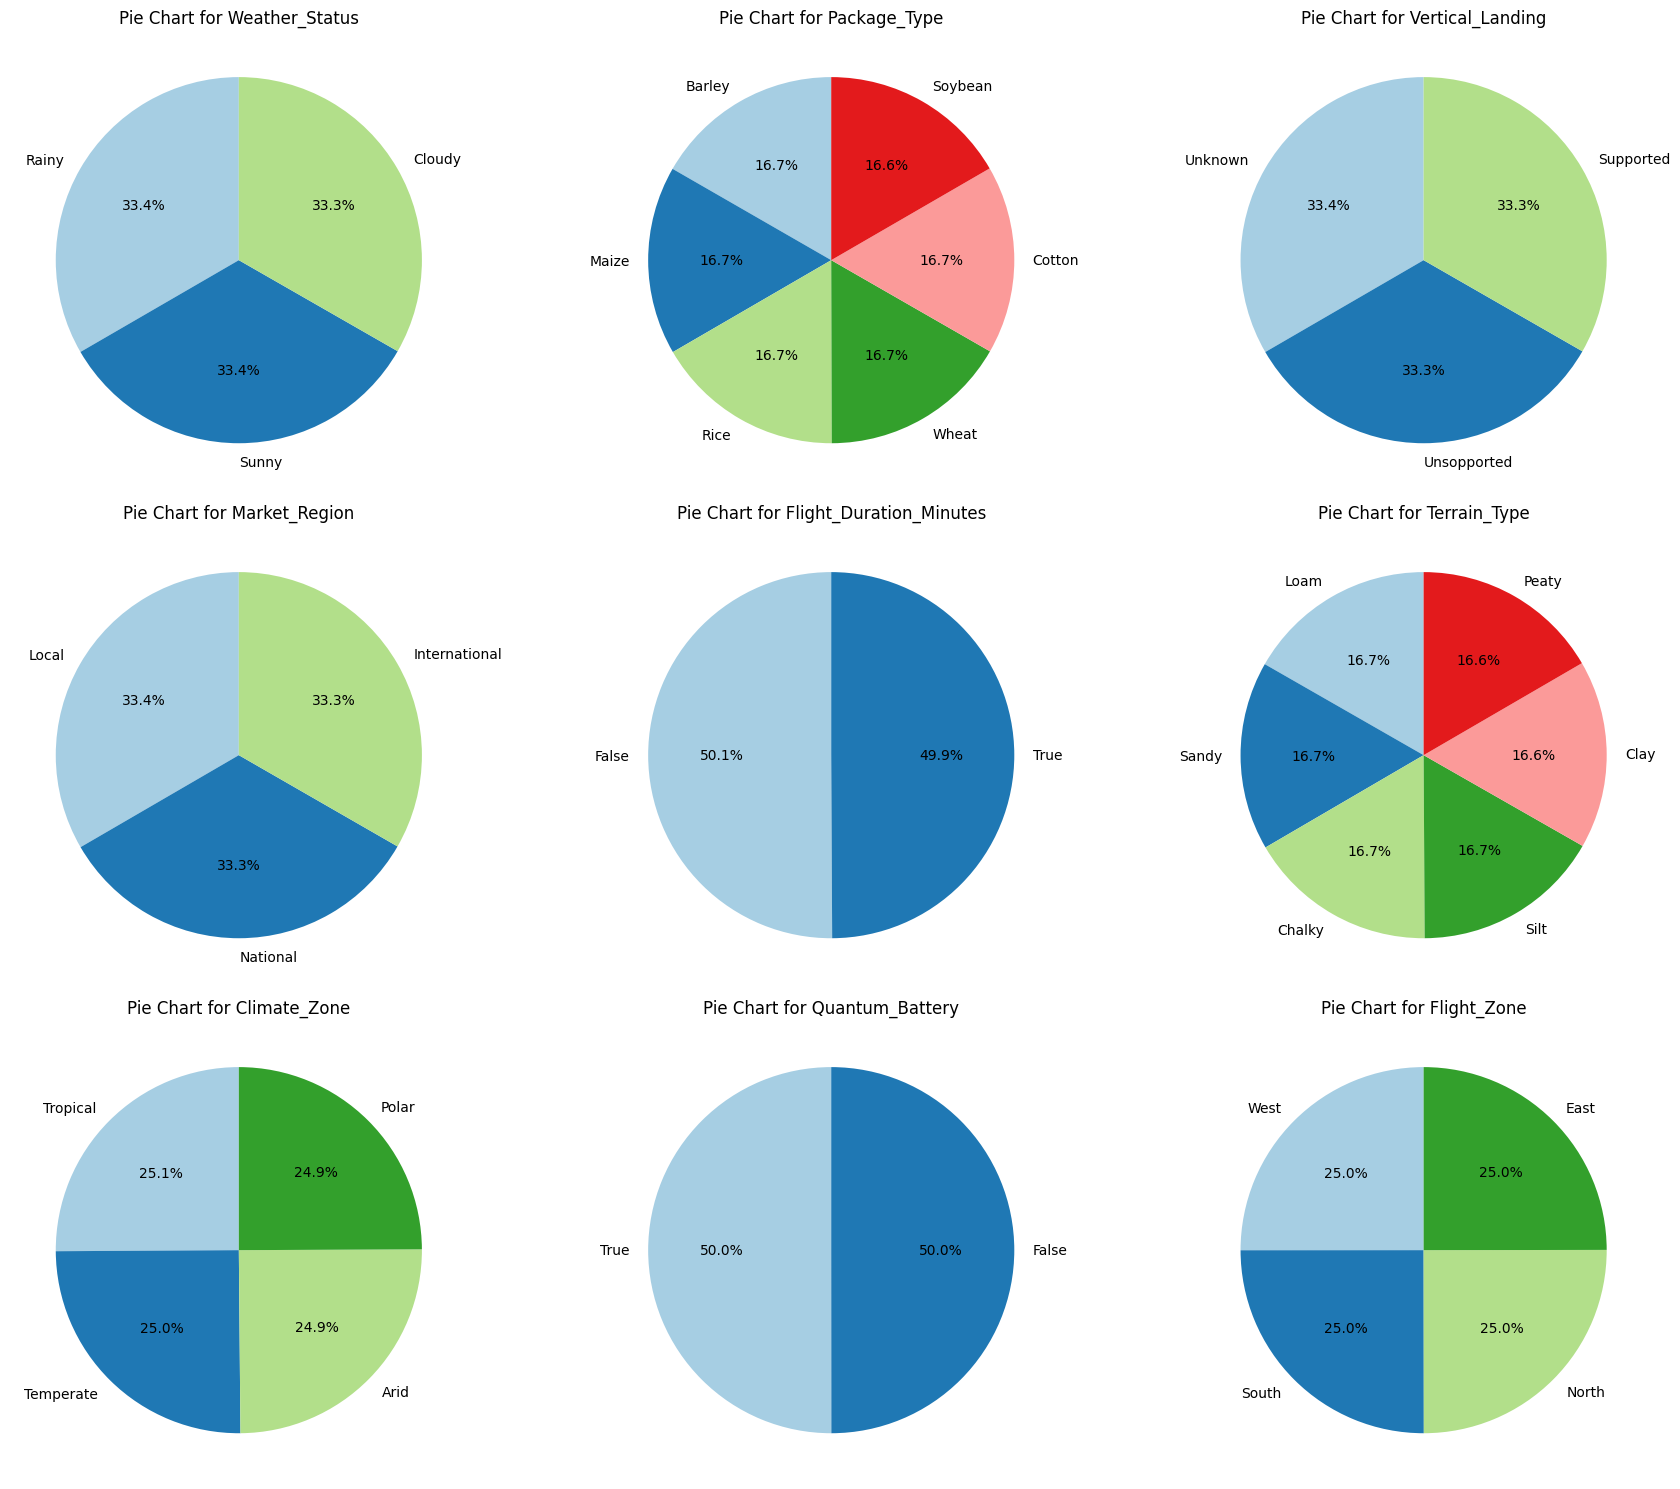

In [605]:
num_cols_per_row = 3
num_rows = (len(categorical.columns) + num_cols_per_row - 1) // num_cols_per_row 
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(18, 5 * num_rows))

axes = axes.flatten()

for i, col in enumerate(categorical.columns):
    categorical[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], startangle=90, colors=plt.cm.Paired.colors)
    axes[i].set_title(f"Pie Chart for {col}")
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

**Interpretation**

* The distribution of categories across all categorical features is fairly balanced.
* For example:
    * **`Weather_Status`** is divided almost equally among Rainy, Sunny and Cloudy.
    * **`Market_Region`** has approximately equal proportions for Local, International, and National.
    * **`Package_Type`** is evenly distributed across all six categories.

This step provides more precise percentages for each category and shows that the categories differ by at most 0.1% in their distribution.

In [606]:
for col in categorical.columns:
    print(f"{col} value counts:\n{aeropolis_df[col].value_counts(normalize=True) * 100}\n")

Weather_Status value counts:
Weather_Status
Rainy     33.359116
Sunny     33.356893
Cloudy    33.283990
Name: proportion, dtype: float64

Package_Type value counts:
Package_Type
Barley     16.687695
Maize      16.683248
Rice       16.674355
Wheat      16.658570
Cotton     16.651456
Soybean    16.644675
Name: proportion, dtype: float64

Vertical_Landing value counts:
Vertical_Landing
Unknown        33.367465
Unsopported    33.337924
Supported      33.294611
Name: proportion, dtype: float64

Market_Region value counts:
Market_Region
Local            33.379413
National         33.313183
International    33.307404
Name: proportion, dtype: float64

Flight_Duration_Minutes value counts:
Flight_Duration_Minutes
False    50.081829
True     49.918171
Name: proportion, dtype: float64

Terrain_Type value counts:
Terrain_Type
Loam      16.719666
Sandy     16.690232
Chalky    16.680680
Silt      16.653579
Clay      16.635808
Peaty     16.620036
Name: proportion, dtype: float64

Climate_Zone value c

**Interpretation**

* The categorical variables show a highly balanced distribution across all categories. 

* For example, the **`Vertical_Landing`** feature shows almost equal proportions for Unknown, Unsupported, and Supported. 

* This balance suggests that no single category dominates, reducing the risk of model bias towards a particular class and ensuring fair representation during training.

#### 1.4.2 Numerical Values

The **`select_dtypes(include=['float64'])`** method filters the DataFrame to include only numerical columns.

In [607]:
numerical = aeropolis_df.select_dtypes(include=['float64'])

The **`.describe()`** method calculates summary statistics for numerical columns, including:
* **`Count`**: Total non-null values.
* **`Mean`**: Average value.
* **`Std (Standard Deviation)`**: Measures variability.
* **`Min, Max`**: Minimum and maximum values.
* **`25%, 50%, 75%`**: Percentiles that help understand the data distribution.

In [608]:
numerical.describe()

Cargo_Capacity_kg  Air_Temperature_Celsius  Equipment_Cost  \
count      899767.000000            900236.000000   900197.000000   
mean            4.649776                27.502480    29987.480920   
std             1.696381                 7.220540    11548.037346   
min            -1.147613                15.000041    10000.140000   
25%             3.418913                21.252947    19972.210000   
50%             4.651655                27.504887    29986.650000   
75%             5.878848                33.751600    39990.970000   
max             9.963372                39.999997    49999.990000   

       Water_Usage_liters   Flight_Hours  Delivery_Time_Minutes  \
count       900344.000000  900273.000000          900036.000000   
mean          4999.072438     149.994980             104.482616   
std           1500.069589      12.254514              25.944757   
min          -2323.700000      95.000000              60.000000   
25%           3987.087500     142.000000              82.000000   
50%           4997.685000     150.000000             104.000000   
75%           6011.532500     158.000000             127.000000   
max          13104.200000     213.000000             149.000000   

       Cleaning_Liquid_Usage_liters  Autopilot_Quality_Index  \
count                 899602.000000            900189.000000   
mean                      50.092852                 0.500285   
std                       50.073233                 0.288772   
min                        0.000000                 0.000000   
25%                       14.450000                 0.250000   
50%                       34.730000                 0.500000   
75%                       69.427500                 0.750000   
max                      716.380000                 1.000000   

       Vertical_Max_Speed  Wind_Speed_kmph  Route_Optimization_Per_Second  
count       899779.000000    900212.000000                  899614.000000  
mean           299.315963       550.079136                     999.718546  
std            115.499584       259.809348                     199.873344  
min            100.000000       100.000896                    -133.070000  
25%            199.000000       325.135896                     864.782500  
50%            299.000000       550.349457                     999.750000  
75%            399.000000       774.780272                    1134.480000  
max            499.000000       999.998098                    1999.670000

**Interpretation**

* The statistical summary provides insights into the numerical variables in the dataset. For the target variable **`Cargo_Capacity_kg`**, the mean is approximately 4.65 kg, with a standard deviation of 1.69 kg, indicating moderate variability. 

* Some negative values suggest potential anomalies or preprocessing errors.

The **`hist()`** function generates histograms for all numerical columns to visualize their distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

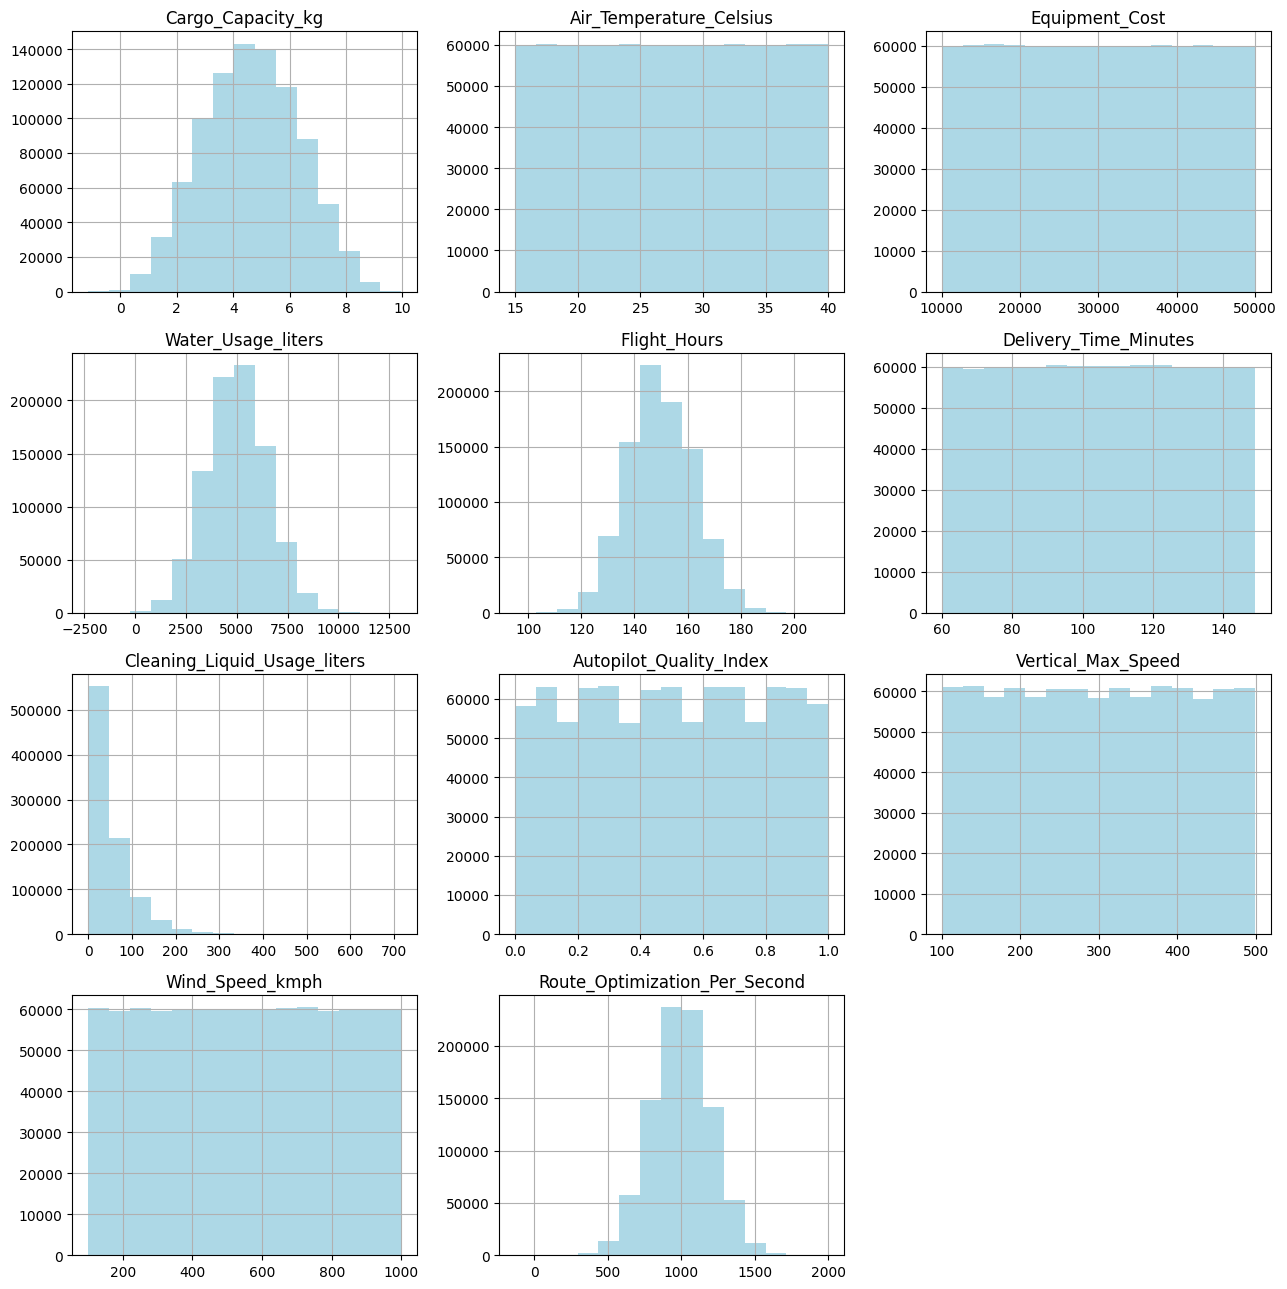

In [612]:
numerical.hist(figsize=(13, 13), bins=15, color="lightblue")
plt.tight_layout()
plt.show

**Interpretation**

* **`Cargo_Capacity_kg`** and **`Water_Usage_liters`**: Have bell-shaped distributions with potential outliers at the edges.
* **`Cleaning_Liquid_Usage_liters`**: Highly skewed to the left, indicating most values are concentrated near zero.
* **`Autopilot_Qualty_Index`**, **`Vertical_Max_Speed`**, and **`Wind_Speed_kmph`**: Show relatively uniform distributions. 

##### 1.4.2.1 Checking for low variability columns

We check for numerical columns with a standard deviation (variability) of less than 0.01, which could be considered as having very little variation and might not add value to the analysis.

In [613]:
low_var_cols = [col for col in numerical.columns if aeropolis_df[col].std() < 0.01]
print(f"Low variability columns: {low_var_cols}")

Low variability columns: []


**Interpretation**

* Since no columns where identified as having low variability, it means that all numerical columns exhibit enough variation to potentially contribute to the analysis.

### 1.5 Handling missing values of the dependent variable

**Why we remove rows with missing target values?**

In a regression problem, the target variable (**`Cargo_Capacity_kg`**) is essential for training and evaluation. Rows with missing target values are removed because:
1. <b>Model Training</b>: The model cannot learn without target values, as it needs them to calculate errors and adjust weights.
2. <b>Evaluation:</b>: Missing target values make it impossible to compare predictions and measure model performance.
3. <b>Data Integrity</b>: Retaining these rows adds noise and unnecessary complexity without contributing to the model.

#### 1.5.1 Dropping rows where the dependent value is missing

The **`dropna()`** method removes rows where the specified column, **`Cargo_Capacity`**, has missing values.

In [621]:
df_dropped_cargo_null = aeropolis_df.dropna(subset=['Cargo_Capacity_kg'])

In [622]:
print(f"Cargo_Capacity_kg missing values in the original dataset: {aeropolis_df['Cargo_Capacity_kg'].isnull().sum()}")
print(f"Cargo_Capacity_kg missing values after dropping the rows: {df_dropped_cargo_null['Cargo_Capacity_kg'].isnull().sum()}")
print(f"We removed the {aeropolis_df.shape[0] - df_dropped_cargo_null.shape[0]} rows and now there are {df_dropped_cargo_null.shape[0]}")

Cargo_Capacity_kg missing values in the original dataset: 100233
Cargo_Capacity_kg missing values after dropping the rows: 0
We removed the 100233 rows and now there are 899767


**Interpretation**

* This part ensures that the dataset has complete target values.

* We maintain the data integrity by preventing issues during model training and evaluation. Models require the target variable to learn and make predictions; missing values would disrupt this process.

## 2. Cleaning the dataset

### 2.1 Encoding Categorical Values

Here we filter out the categorical columns and iterate through each column to display its name and the unique categories it contains. It provides an overview of all possible values in each categorical column, including any missing values. 

The result will help us with the mapping.

In [623]:
categorical_columns = aeropolis_df.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Categories: {aeropolis_df[column].unique()}\n")

Column: Weather_Status
Categories: ['Cloudy' 'Sunny' nan 'Rainy']

Column: Package_Type
Categories: ['Maize' 'Cotton' 'Barley' 'Soybean' 'Wheat' nan 'Rice']

Column: Vertical_Landing
Categories: ['Supported' 'Unknown' nan 'Unsopported']

Column: Market_Region
Categories: ['Local' 'International' nan 'National']

Column: Flight_Duration_Minutes
Categories: [False True nan]

Column: Terrain_Type
Categories: [nan 'Sandy' 'Clay' 'Loam' 'Chalky' 'Silt' 'Peaty']

Column: Climate_Zone
Categories: ['Arid' 'Temperate' 'Polar' nan 'Tropical']

Column: Quantum_Battery
Categories: [False True nan]

Column: Flight_Zone
Categories: ['East' 'North' 'West' 'South' nan]



We calculate the average **`Cargo_Capacity_kg`** for each category within a categorical column by grouping the dataset using **`groupby`** and applying the **`.mean()`** function to the target column. It identifies if categories have distinct effects on the target value.

In [624]:
for column in categorical_columns:
    print(f"Correlation of {column} with Cargo_Capacity_kg:")
    print(aeropolis_df.groupby(column)['Cargo_Capacity_kg'].mean())
    print("\n")

Correlation of Weather_Status with Cargo_Capacity_kg:
Weather_Status
Cloudy    4.648313
Rainy     4.649595
Sunny     4.652301
Name: Cargo_Capacity_kg, dtype: float64


Correlation of Package_Type with Cargo_Capacity_kg:
Package_Type
Barley     4.647131
Cotton     4.653509
Maize      4.642438
Rice       4.649484
Soybean    4.651459
Wheat      4.649950
Name: Cargo_Capacity_kg, dtype: float64


Correlation of Vertical_Landing with Cargo_Capacity_kg:
Vertical_Landing
Supported      4.652998
Unknown        4.644340
Unsopported    4.651187
Name: Cargo_Capacity_kg, dtype: float64


Correlation of Market_Region with Cargo_Capacity_kg:
Market_Region
International    4.644374
Local            4.656271
National         4.649495
Name: Cargo_Capacity_kg, dtype: float64


Correlation of Flight_Duration_Minutes with Cargo_Capacity_kg:
Flight_Duration_Minutes
False    4.049915
True     5.248333
Name: Cargo_Capacity_kg, dtype: float64


Correlation of Terrain_Type with Cargo_Capacity_kg:
Terrain_Type
C

**Interpretation**

* The results show the mean **`Cargo_Capacity_kg`** for each category. For example, **`Weather_Status`** has similar mean values across **`Cloudy`**, **`Sunny`**, and **`Rainy`**, indicating little influence of weather on the target variable. 

* Similarly, other columns like **`Package_Type`** and **`Vertical_Landing`** also show minimal differences across categories, suggesting a weak correlation. This justifies the decision to then map categories radomly, as their direct impact on the target appears negligible.

In [625]:
df_encoded = df_dropped_cargo_null.copy()

Here, we defined a dictionary of mappings, assigning a numerical value to each category in the categorical columns. The **`map()`** function is used to replace the original categorical values with their corresponding numerical mappings for each column.

We preserved the **`NaN`** values for later imputation.

In [626]:
mappings = {
    'Weather_Status': {'Cloudy': 0, 'Sunny': 1, 'Rainy': 2},
    'Package_Type': {'Maize': 0, 'Cotton': 1, 'Barley': 2, 'Soybean': 3, 'Wheat': 4, 'Rice': 5},
    'Vertical_Landing': {'Supported': 0, 'Unknown': 1, 'Unsopported': 2},
    'Market_Region': {'Local': 0, 'International': 1, 'National': 2},
    'Flight_Duration_Minutes': {False: 0, True: 1},
    'Terrain_Type': {'Sandy': 0, 'Clay': 1, 'Loam': 2, 'Chaly': 3, 'Silt': 4, 'Peaty': 5},
    'Climate_Zone': {'Arid': 0, 'Temperate': 1, 'Polar': 2, 'Tropical': 3},
    'Quantum_Battery': {False: 0, True: 1},
    'Flight_Zone': {'East': 0, 'North': 1, 'West': 2, 'South': 3}
}

for column, mapping in mappings.items():
    if column in df_encoded.columns:
        print(f"Column: {column}")
        print(f"Before mapping: {df_encoded[column].unique()}")
        df_encoded[column] = df_encoded[column].map(mapping)
        print(f"After mapping: {df_encoded[column].unique()}")

Column: Weather_Status
Before mapping: ['Cloudy' 'Sunny' nan 'Rainy']
After mapping: [ 0.  1. nan  2.]
Column: Package_Type
Before mapping: ['Maize' 'Cotton' 'Barley' 'Soybean' 'Wheat' nan 'Rice']
After mapping: [ 0.  1.  2.  3.  4. nan  5.]
Column: Vertical_Landing
Before mapping: ['Supported' 'Unknown' nan 'Unsopported']
After mapping: [ 0.  1. nan  2.]
Column: Market_Region
Before mapping: ['Local' 'International' nan 'National']
After mapping: [ 0.  1. nan  2.]
Column: Flight_Duration_Minutes
Before mapping: [False True nan]
After mapping: [ 0.  1. nan]
Column: Terrain_Type
Before mapping: [nan 'Sandy' 'Clay' 'Loam' 'Chalky' 'Silt' 'Peaty']
After mapping: [nan  0.  1.  2.  4.  5.]
Column: Climate_Zone
Before mapping: ['Arid' 'Temperate' 'Polar' nan 'Tropical']
After mapping: [ 0.  1.  2. nan  3.]
Column: Quantum_Battery
Before mapping: [False True nan]
After mapping: [ 0.  1. nan]
Column: Flight_Zone
Before mapping: ['East' 'North' 'West' 'South' nan]
After mapping: [ 0.  1.  2.  3

In [630]:
print(df_encoded.dtypes)

Cargo_Capacity_kg                float64
Air_Temperature_Celsius          float64
Weather_Status                   float64
Package_Type                     float64
Vertical_Landing                 float64
Equipment_Cost                   float64
Market_Region                    float64
Flight_Duration_Minutes          float64
Terrain_Type                     float64
Water_Usage_liters               float64
Flight_Hours                     float64
Delivery_Time_Minutes            float64
Cleaning_Liquid_Usage_liters     float64
Climate_Zone                     float64
Quantum_Battery                  float64
Flight_Zone                      float64
Autopilot_Quality_Index          float64
Vertical_Max_Speed               float64
Wind_Speed_kmph                  float64
Route_Optimization_Per_Second    float64
dtype: object


In [629]:
df_encoded.sample(5)

Cargo_Capacity_kg  Air_Temperature_Celsius  Weather_Status  \
454690           5.235152                27.332533             2.0   
898633           6.099103                28.008228             0.0   
740628           7.152935                32.835061             0.0   
867931           2.548236                      NaN             0.0   
556276           3.959301                25.155721             2.0   

        Package_Type  Vertical_Landing  Equipment_Cost  Market_Region  \
454690           NaN               NaN             NaN            2.0   
898633           5.0               1.0        41351.30            2.0   
740628           0.0               0.0        11311.03            1.0   
867931           3.0               0.0        37911.87            2.0   
556276           3.0               2.0        20634.29            2.0   

        Flight_Duration_Minutes  Terrain_Type  Water_Usage_liters  \
454690                      1.0           5.0                 NaN   
898633                      0.0           NaN             5058.61   
740628                      1.0           NaN             4107.04   
867931                      0.0           NaN             5490.32   
556276                      0.0           4.0             6461.70   

        Flight_Hours  Delivery_Time_Minutes  Cleaning_Liquid_Usage_liters  \
454690         143.0                   81.0                          7.95   
898633         170.0                   87.0                         16.26   
740628         152.0                   76.0                         69.70   
867931         141.0                  128.0                         14.93   
556276         150.0                   69.0                          1.49   

        Climate_Zone  Quantum_Battery  Flight_Zone  Autopilot_Quality_Index  \
454690           3.0              0.0          1.0                     0.98   
898633           2.0              1.0          1.0                      NaN   
740628           NaN              1.0          3.0                     0.41   
867931           1.0              0.0          1.0                     0.74   
556276           2.0              1.0          2.0                     0.52   

        Vertical_Max_Speed  Wind_Speed_kmph  Route_Optimization_Per_Second  
454690               229.0       600.642835                        1059.72  
898633               415.0       902.587187                            NaN  
740628               287.0       754.750457                         759.83  
867931               148.0       610.730854                         810.59  
556276               101.0       564.108207                         999.31

**Interpretation**

* The data types confirm that all columns are now numerical, ready for further processing and modeling. 

* The random samples show the encoded categorical columns alongside the numerical features, with some missing values still present.

### 2.2 Finding the correlation between the independent values and the target value

We compute the pairwise correlation between all the columns using **`.corr()`** and then visualize it in a heatmap using **`seaborn.heatmap`**.

In [408]:
cols = df_encoded.columns
correlation_matrix = df_encoded[cols].corr()

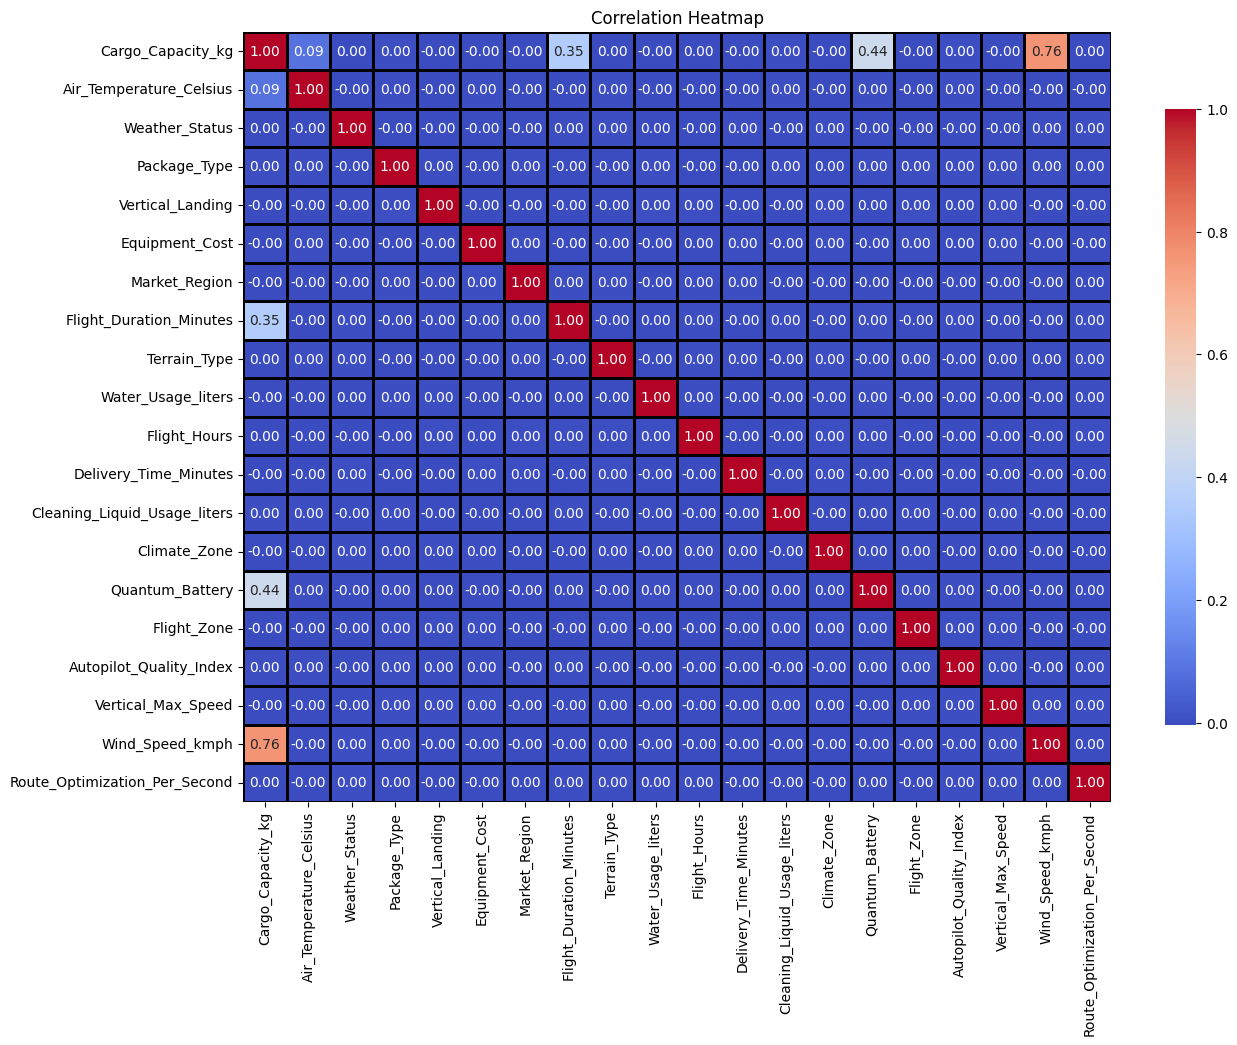

In [409]:
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f', 
            linewidths=1, 
            linecolor='black',
            annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Interpretation**

* The heatmap shows correlations between all variables. For example, **`Wind_Speed_kmph`** has a strong positive correlation (**`0.76`**) with the target **`Cargo_Capacity_kg`**. 

* On the other hand, features like **`Vertical_Max_Speed`** and **`Market_Region`** show near-zero or negative correlations.

* Additionally, the lack of strong correlations among most features suggests low multicollinearity, which is advantageous for regression models, as it helps to avoid redundancy and ensures better feature contributions to predictions.

We extract the correlation values between all features and the target, sorting them in ascending order.

In [410]:
correlation_with_target = correlation_matrix['Cargo_Capacity_kg'].sort_values(ascending=False)

print("Correlation with 'Cargo_Capacity_kg': ")
print(correlation_with_target)

Correlation with 'Cargo_Capacity_kg': 
Cargo_Capacity_kg                1.000000
Wind_Speed_kmph                  0.764468
Quantum_Battery                  0.442327
Flight_Duration_Minutes          0.353274
Air_Temperature_Celsius          0.085805
Autopilot_Quality_Index          0.001909
Package_Type                     0.000833
Cleaning_Liquid_Usage_liters     0.000821
Weather_Status                   0.000308
Route_Optimization_Per_Second    0.000193
Terrain_Type                     0.000174
Flight_Hours                     0.000049
Climate_Zone                    -0.000409
Vertical_Landing                -0.000434
Vertical_Max_Speed              -0.000659
Water_Usage_liters              -0.000795
Flight_Zone                     -0.000855
Equipment_Cost                  -0.001262
Market_Region                   -0.001632
Delivery_Time_Minutes           -0.003536
Name: Cargo_Capacity_kg, dtype: float64


**Interpretation**

* The output shows that **`Wind_Speed_kmph`** has the highest positive correlation (0.76), followed by **`Quantum_Battery`** (0.44). 

* Features like **`Delivery_Time_Minutes`** and **`Market_Region`** have weak or negative correlations, making them potetial candidates for removal to simplify the model.

### 2.3 Dropping rows with missing values in important features 

The rows with missing values for the highly correlated features are removed, ensuring that critical data points aren't compromised when training the model.

In [637]:
df_dropped_rows = df_encoded.dropna(subset=[
    'Wind_Speed_kmph', 'Quantum_Battery',
    'Flight_Duration_Minutes', 'Air_Temperature_Celsius',
    'Autopilot_Quality_Index', 'Package_Type',
    'Cleaning_Liquid_Usage_liters', 'Weather_Status',
    'Route_Optimization_Per_Second', 'Terrain_Type',
    'Flight_Hours'])

In [638]:
print(f"We removed the {df_encoded.shape[0] - df_dropped_rows.shape[0]} rows and now there are {df_dropped_rows.shape[0]}")

We removed the 663830 rows and now there are 235937


### 2.4 Dropping irrelevant or negatively correlated columns

Columns with weak or negative correlations to the target are dropped to reduce dimensionality and eliminate noise in the dataset.

In [413]:
df_cleaned = df_dropped_rows.drop(columns=[
    'Delivery_Time_Minutes', 'Market_Region',
    'Equipment_Cost', 'Flight_Zone',
    'Water_Usage_liters', 'Vertical_Max_Speed'])

In [414]:
print(f"Remaining columns are {df_cleaned.shape[1]} from {df_dropped_rows.shape[1]}")

Remaining columns are 14 from 20


### 2.5 Removing skewness

From the descriptive statistics before, we saw that one of the numerical values had potential of being skewed, therefore we have to remove it.

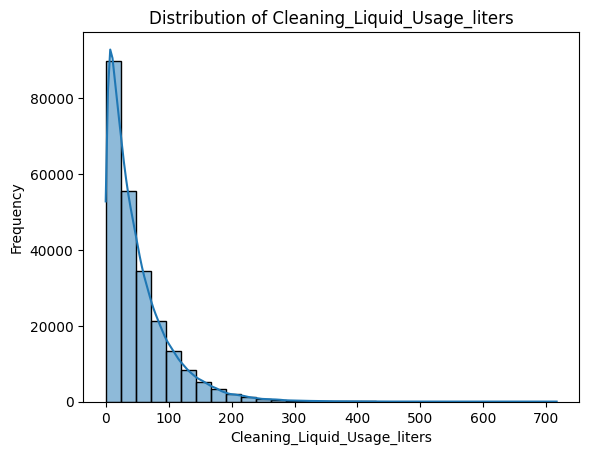

In [639]:
sns.histplot(df_cleaned["Cleaning_Liquid_Usage_liters"], kde=True, bins=30)
plt.title("Distribution of Cleaning_Liquid_Usage_liters")
plt.xlabel("Cleaning_Liquid_Usage_liters")
plt.ylabel("Frequency")
plt.show()

**Interpretation**

* The original distribution of **`Cleaning_Liquid_Usage_liters`** is right-skewed, indicating that most values are clustered near zero. After the log transformation, the distribution becomes more symmetric, which can improve model performance by ensuring that the feature follows a normal distribution.

The column **`Cleaning_Liquid_Usage_liters`** in the copied dataset is transformed using **`np.log1p`**, which applies a logarithmic transformation (**`log(1+x)`**) to each value. 

This technique is often used to reduce skewness in data, especially when the original data has extreme outliers or a long tail.

In [640]:
df_without_skewness = df_cleaned.copy()
df_without_skewness["Cleaning_Liquid_Usage_liters"] = np.log1p(df_without_skewness["Cleaning_Liquid_Usage_liters"])

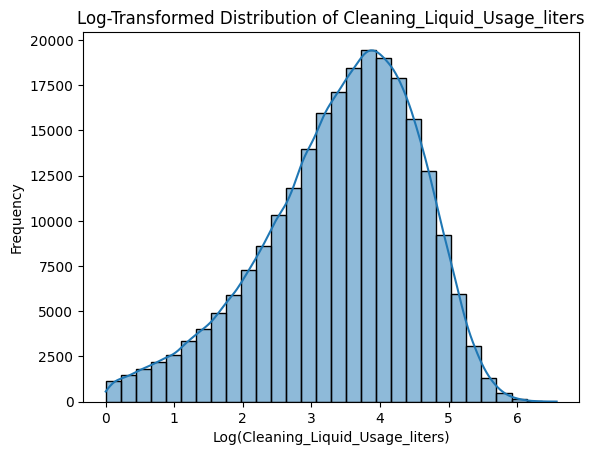

In [641]:
sns.histplot(df_without_skewness["Cleaning_Liquid_Usage_liters"], kde=True, bins=30)
plt.title("Log-Transformed Distribution of Cleaning_Liquid_Usage_liters")
plt.xlabel("Log(Cleaning_Liquid_Usage_liters)")
plt.ylabel("Frequency")
plt.show()

**Interpretation**

* The graph displays the distribution of the log-transformed **`Cleaning_Liquid_Usage_liters`** values. The transformation successfully reduces skewness, making the data more symmetrical and closer to a normal distribution.

* This adjustment improves the suitability of the data for machine learning models that assume normally distributed input features.

* The peak near the center indicates the most frequent log-transformed values, while the tails on either side show lower frequencies of extreme values, effectively reducing their impact on modeling.

### 2.6 Removing Outliers

**What are outliers?**

Outliers are data points that significantly differ from the majority of the dataset, often lying far outside the expected range. They can distort statistical analyses and model performance if not addressed.

#### 2.6.1 Outlier identification

This code generates boxplots for each column in the dataset to identify potential outliers visually. 

* The **`plt.subplots`** function creates a grid of plots with enough rows and columns to accommodate all features.


* The **`sns.boxplot`** function plots the distribution of each feature and highlights values that lie outside the whiskers, which represent the interquartile range (IQR).


* The boxplots are customized with titles and axis labels for clarity, and unused subplot axes are turned off for a cleaner presentation.

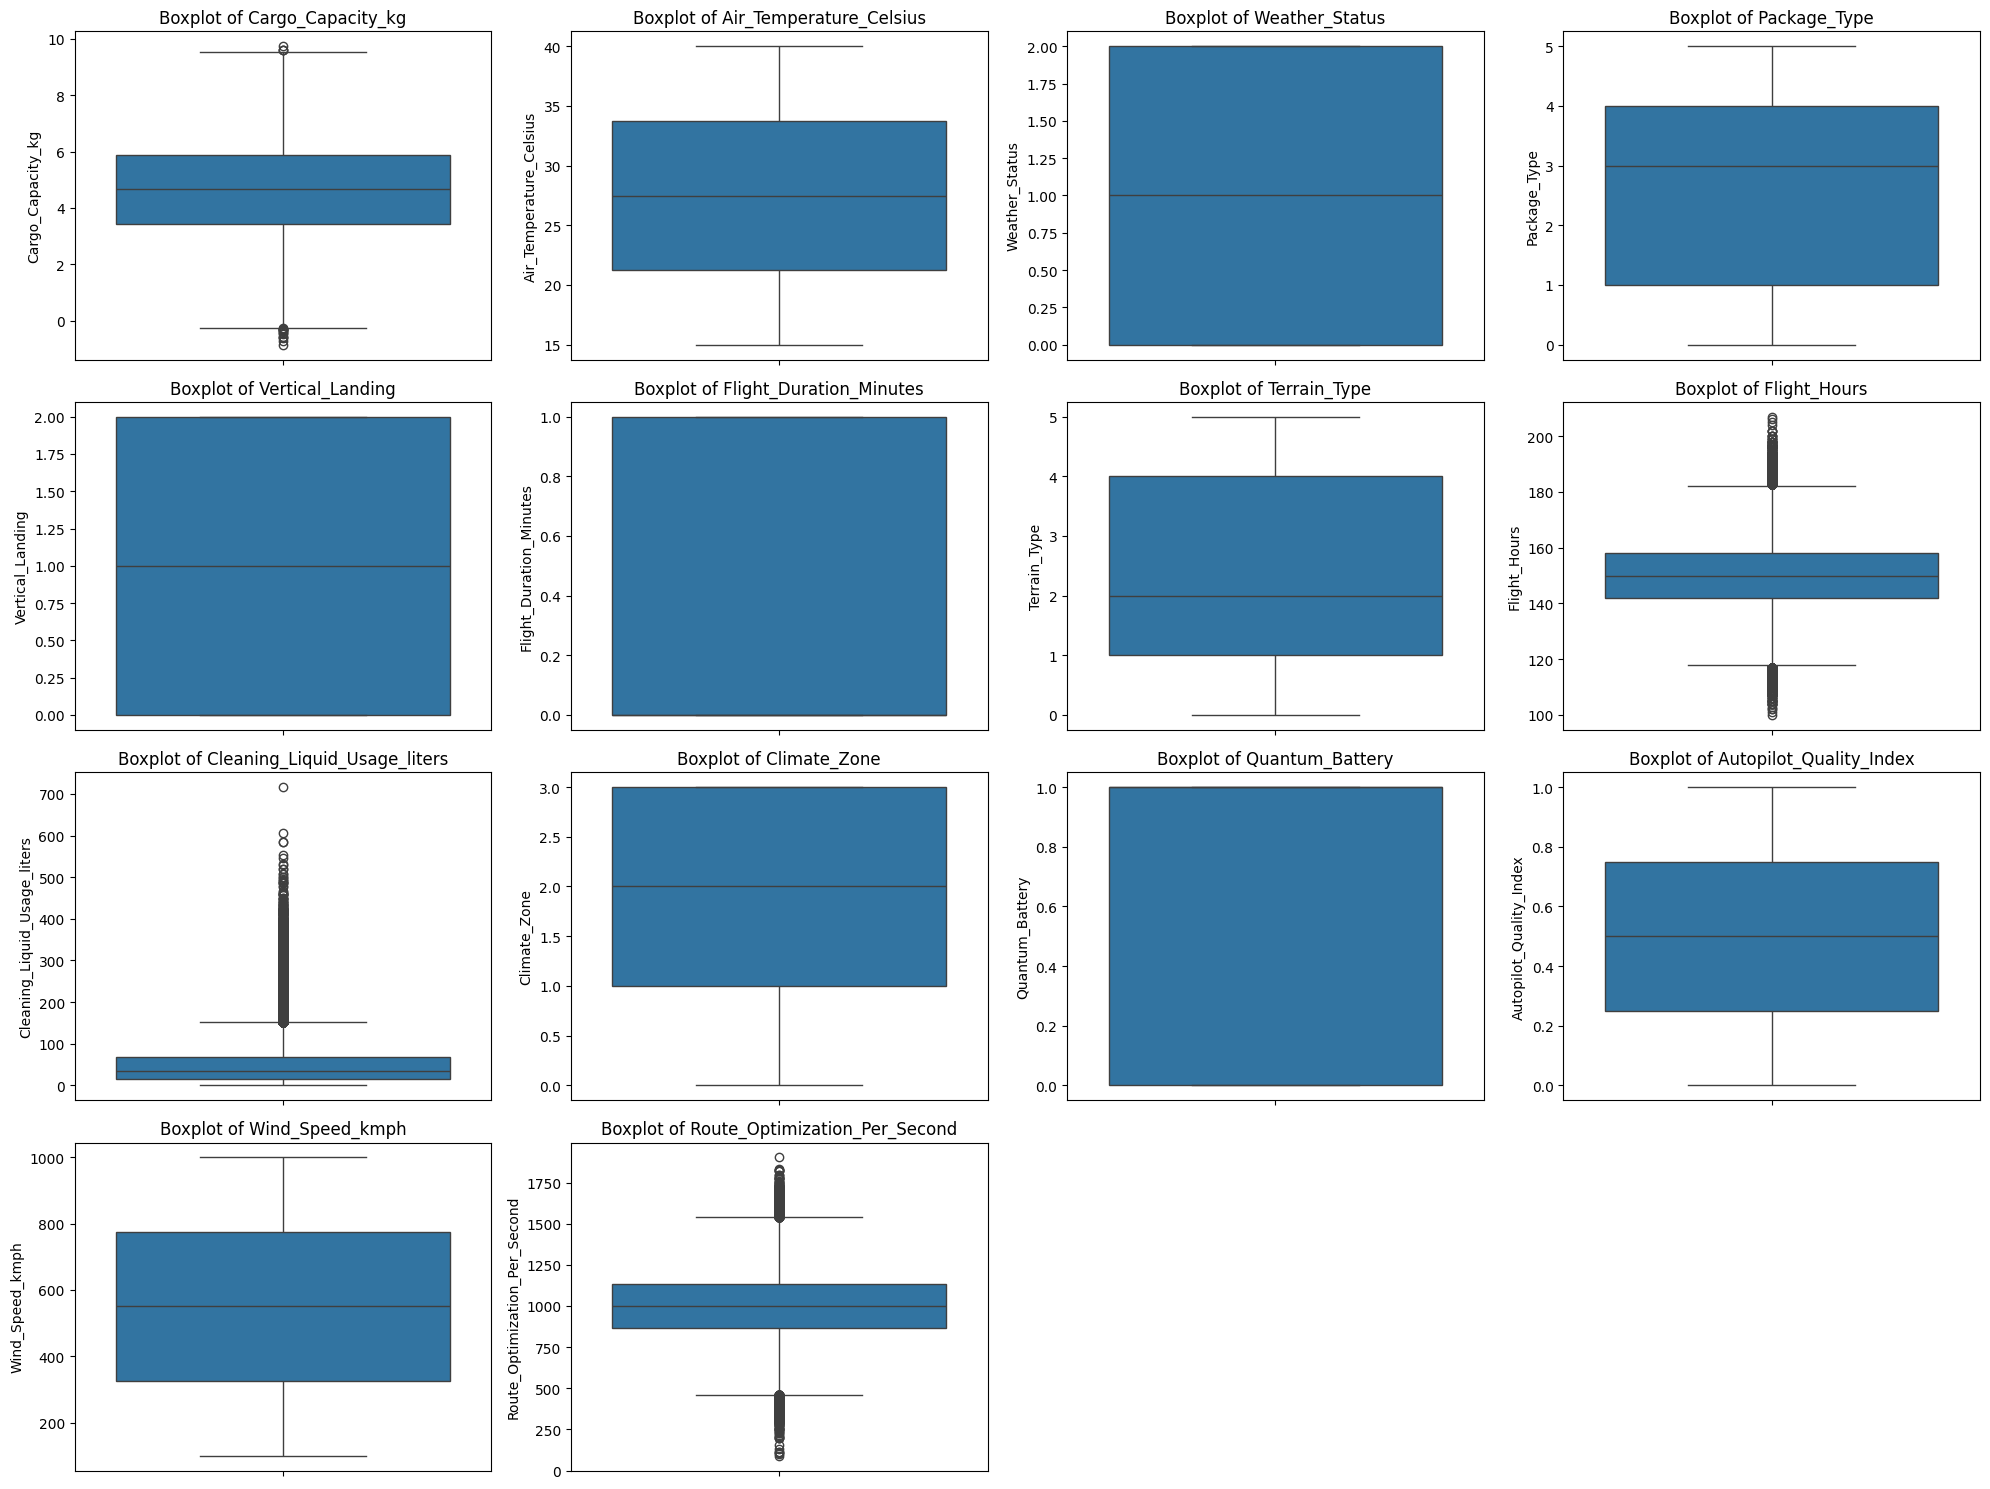

In [642]:
boxplot_columns = df_without_skewness.columns
num_cols_per_row = 4
num_rows = (len(boxplot_columns) + num_cols_per_row - 1) // num_cols_per_row
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(boxplot_columns):
    sns.boxplot(data=df_cleaned, y=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(column)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

**Interpretation**

Several features, such as **`Flight Hours`** and **`Cleaning_Liquid_Usage_liters`**, show significant outliers. Identifying these helps decide whether to remove or handle them, depending on their impact on model performance.

#### 2.6.2 Removing outliers

The function **`remove_outliers_iqr`** applies the IQR method to filter out outliers.

* It calculates the first quartile (Q1), third quartile (Q3), ad the IQR (Q3 - Q1) for each column.


* Using the lower and upper bounds defined as **`Q1 - 1.5 * IQR`** ad **`Q3 + 1.5 * IQR`**, it removes rows with values outside this range for each column.


In [487]:
def remove_outliers_iqr(df, columns):
    filtered_df = df.copy()
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        filtered_df = filtered_df[(filtered_df[column] >= lower_bound) & (filtered_df[column] <= upper_bound)]
    return filtered_df

In [488]:
df_filtered = remove_outliers_iqr(df_without_skewness, df_without_skewness.columns)
print(f"Original DataFrame shape: {df_without_skewness.shape}")
print(f"Cleaned DataFrame shape: {df_filtered.shape}")

Original DataFrame shape: (235937, 14)
Cleaned DataFrame shape: (185910, 14)


**Interpretation**

* The filtered dataset has fewer rows than the original, indicating that outliers were successfully removed.

* This step improves data quality by reducing noise, which can enhance the performance of machine learning models.

#### 2.6.3 Boxplots of the filtered data

After removing outliers, we generate a new set of boxplots for the filtered dataset. This helps us to visualize the fact that we are clear from the outliers.

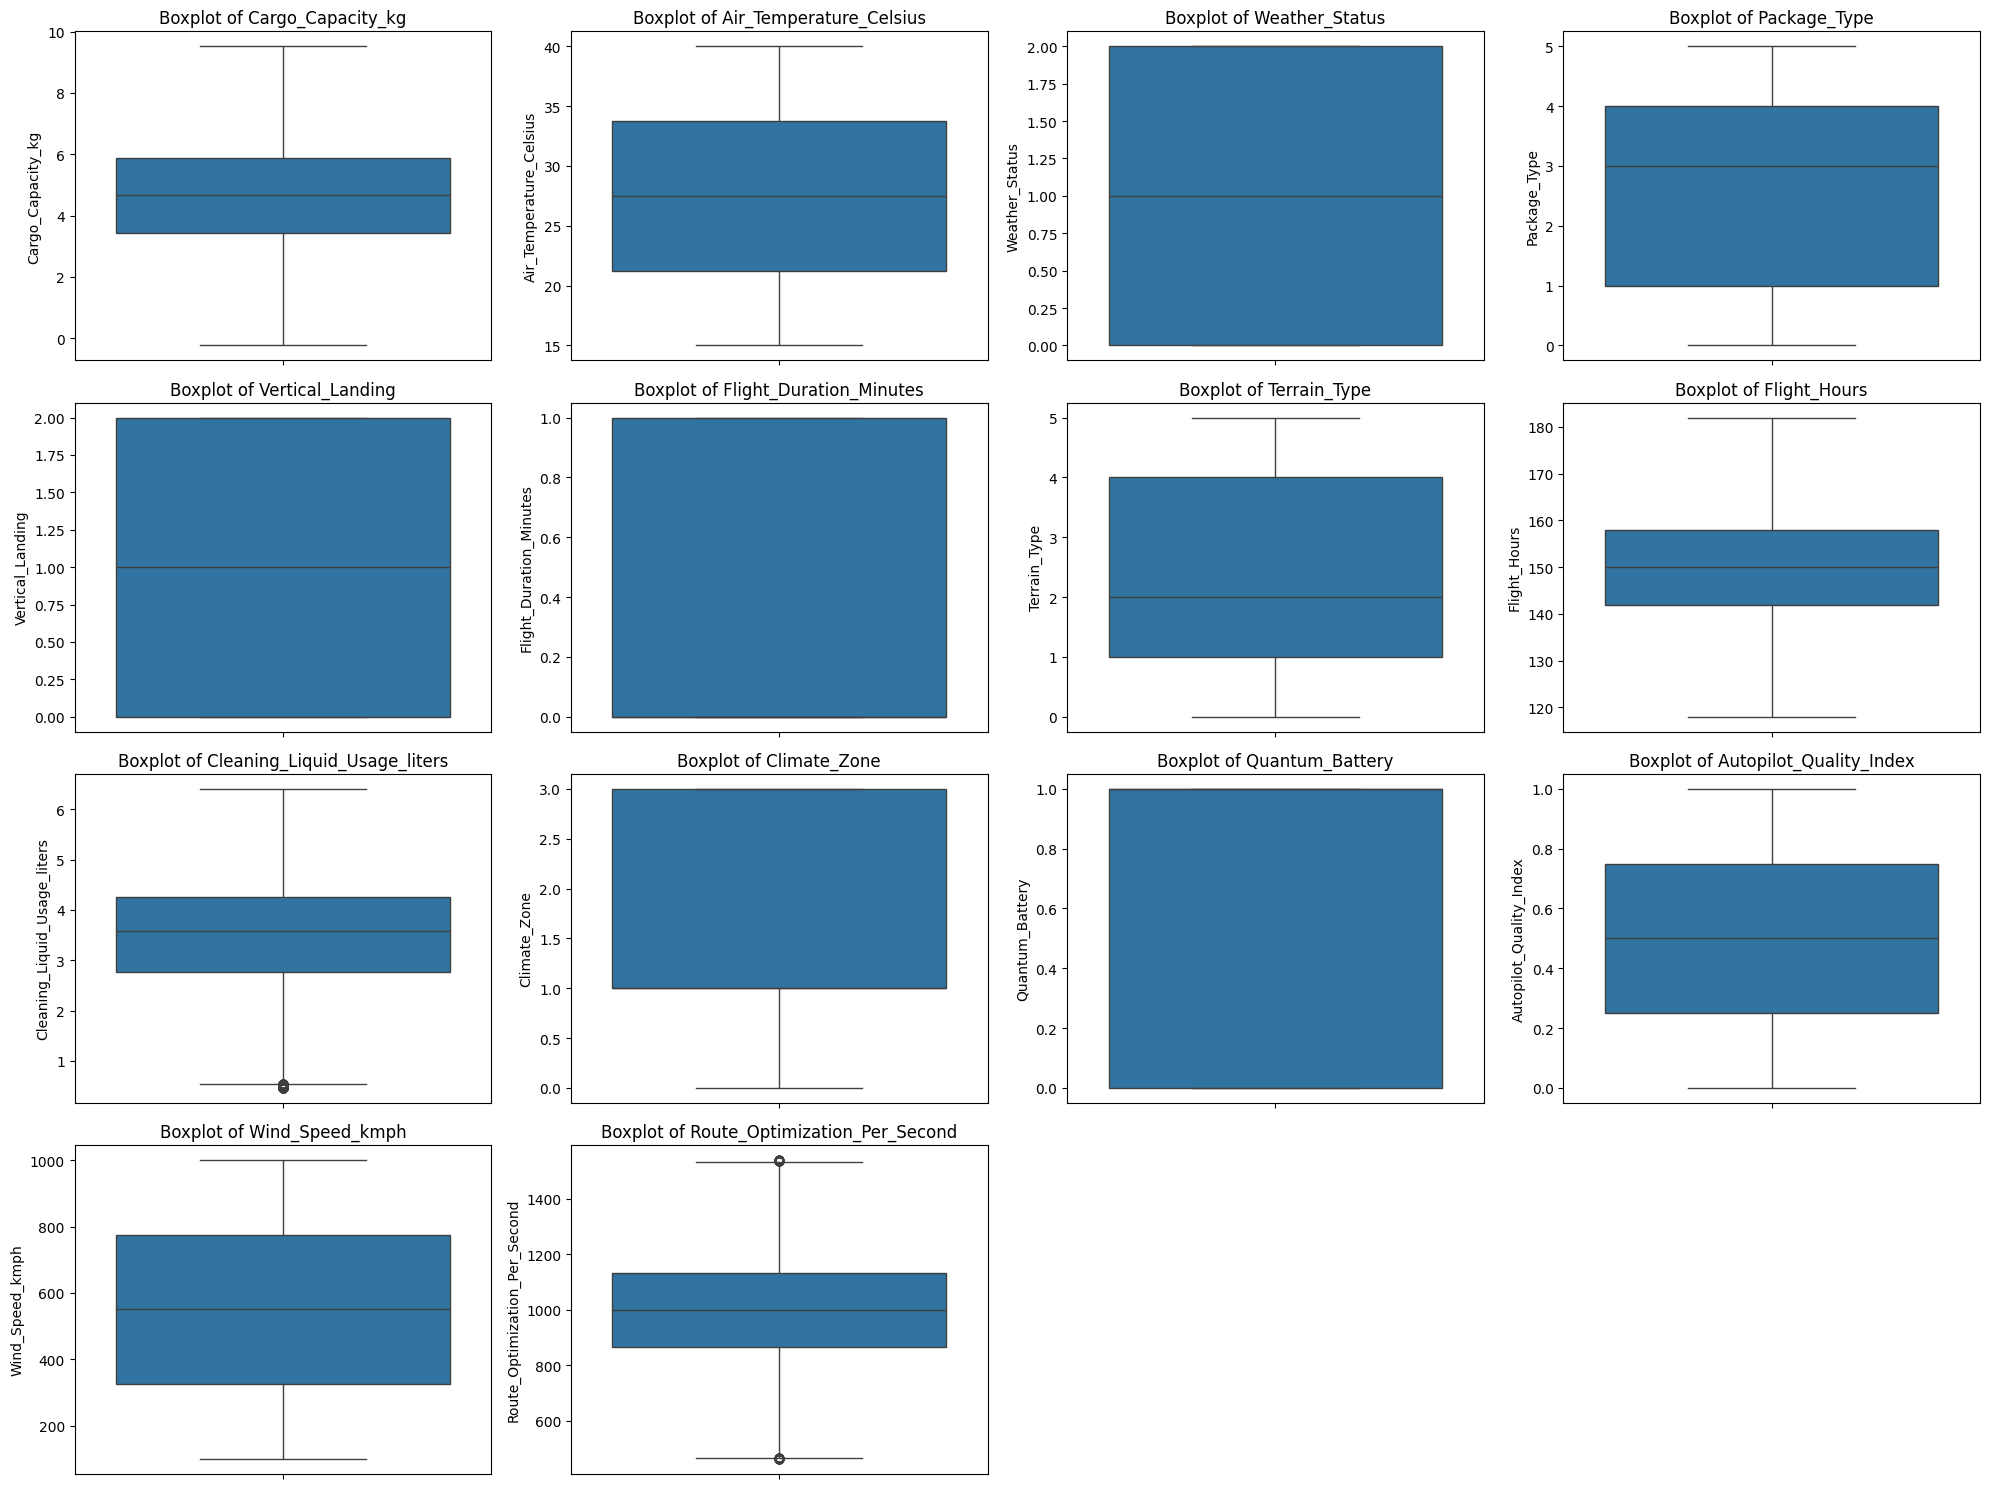

In [489]:
boxplot_columns_filtered = df_filtered.columns
num_cols_per_row = 4
num_rows = (len(boxplot_columns) + num_cols_per_row - 1) // num_cols_per_row
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(boxplot_columns_filtered):
    sns.boxplot(data=df_filtered, y=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel(column)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

**Interpretation**

* The new boxplots show that most extreme values have been removed, and the distributions are now more compact.

* The absence of extreme values suggests the dataset is now better suited for analysis and modeling.

### 2.7 Downsampling

**What is downsampling?** 

Downsampling is the process of reducing the size of a dataset by randomly selecting a subset of rows while maintaining the overall structure and distribution of the data. This is typically done to make the dataset smaller, more manageable, and computationally efficient for machine learning tasks.

**Why downsample the Dataset?**

In the more filtered dataset, the shape indicates a very large number of rows (235k). Processing such a large dataset can be computationally expensive and time-consuming, especially for iterative tasks like hyperparameter tuning or model evaluation. Downsampling reduces the dataset size to a more manageable level, allowing quicker analysis and experimentation. Additionally, downsampling preserves the distribution of the target variable, ensuring that insights gained during analysis or modeling remain representative of the original dataset.

#### 2.7.1 Distribution of the target value before sampling

The **`sns.histplot`** function is used to visualize the distribution of the target variable before and after sampling.

The KDE (Kernel Density Estimation) overlay provides a smoothed estimate of the data distribution.

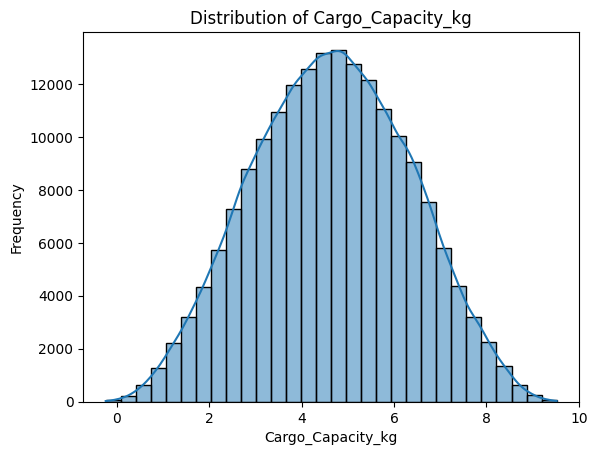

In [490]:
sns.histplot(df_filtered["Cargo_Capacity_kg"], kde=True, bins=30)
plt.title("Distribution of Cargo_Capacity_kg")
plt.xlabel("Cargo_Capacity_kg")
plt.ylabel("Frequency")
plt.show()

**Interpretation**

* The distribution of **`Cargo_Capacity_kg`** appears symmetrical and bell-shaped, consistent with a normal distribution.

The downsampling step reduces the size of the dataset by randomly sampling 10% of the rows using the **`sample`** method.

This step helps reduce computational complexity whie preserving the overall data distribution.

In [491]:
downsampled_df = df_filtered.sample(frac=0.1, random_state=42)

In [493]:
downsampled_df.shape

(18591, 14)

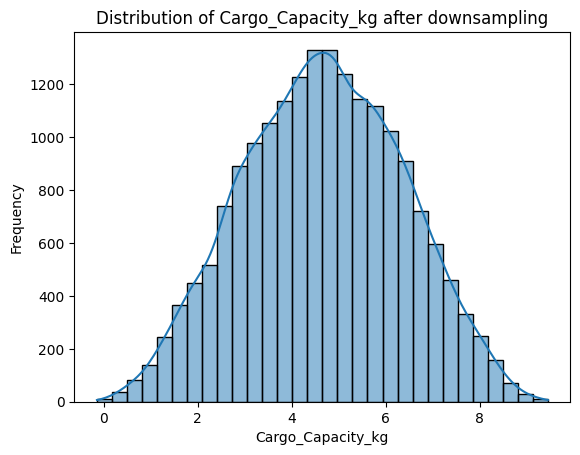

In [494]:
sns.histplot(downsampled_df["Cargo_Capacity_kg"], kde=True, bins=30)
plt.title("Distribution of Cargo_Capacity_kg after downsampling")
plt.xlabel("Cargo_Capacity_kg")
plt.ylabel("Frequency")
plt.show()

**Interpretation**

* After downsampling, the shape of the distribution is the same and remains unchanged, confirming that random sampling preserved the dataset's statistical properties.

#### 2.7.2 Comparing Variance in the Original and Downsampled Dataset

Here we calculate and compare the variance of each feature in the original and downsampled datasets.

This ensures that downsampling did not significantly alter the data's statistical properties.

In [585]:
original_variance = df_filtered.var()
downsampled_variance = downsampled_df.var()

variance_comparison = pd.DataFrame({
    'Original Variance': original_variance,
    'Downsampled Variance': downsampled_variance
})

variance_comparison

Original Variance  Downsampled Variance
Cargo_Capacity_kg                       2.862939              2.896988
Air_Temperature_Celsius                52.296502             52.511906
Weather_Status                          0.666843              0.664280
Package_Type                            2.914168              2.895944
Vertical_Landing                        0.666139              0.672962
Flight_Duration_Minutes                 0.249999              0.250013
Terrain_Type                            3.452729              3.460199
Flight_Hours                          140.704350            141.288217
Cleaning_Liquid_Usage_liters            1.166065              1.169588
Climate_Zone                            1.250069              1.258687
Quantum_Battery                         0.250001              0.249960
Autopilot_Quality_Index                 0.083505              0.082609
Wind_Speed_kmph                     67411.203843          67789.151238
Route_Optimization_Per_Second       37540.156443          37219.396965

**Interpretation**

* The variance values before and after downsampling are almost identical for all features.

* This demonstrates that downsampling did not alter the data's spread or variability, ensuring that the smaller dataset remains representative of the origial.

## 3. Feature Selection

### 3.1 Splitting discrete and continuous values

In [495]:
df_filled = downsampled_df.copy()

The code splits the dataset into discrete and continuous variables. It first identifies numerical columns using **`select_dtypes`** for **`float64`** and **`int64`**. 

A threshold of 10 unique values is used to classify columns as discrete (if they have fewer uniqu values) or continuous (if they have more). 

This helps organize the data for preprocessing since discrete and continuous variables often need to be handled differently.

In [496]:
discrete_threshold = 10

numerical_columns = df_filled.select_dtypes(include=['float64', 'int64']).columns

discrete_columns = [col for col in numerical_columns if df_encoded[col].nunique() <= discrete_threshold]
continuous_columns = [col for col in numerical_columns if df_encoded[col].nunique() > discrete_threshold]

print("Discrete Columns:", len(discrete_columns), discrete_columns)
print("Continuous Columns:", len(continuous_columns), continuous_columns)

Discrete Columns: 7 ['Weather_Status', 'Package_Type', 'Vertical_Landing', 'Flight_Duration_Minutes', 'Terrain_Type', 'Climate_Zone', 'Quantum_Battery']
Continuous Columns: 7 ['Cargo_Capacity_kg', 'Air_Temperature_Celsius', 'Flight_Hours', 'Cleaning_Liquid_Usage_liters', 'Autopilot_Quality_Index', 'Wind_Speed_kmph', 'Route_Optimization_Per_Second']


### 3.2 Normalizing Continuous Features

The **`scale_features`** uses the **`StandardScaler`** to normalize continuous variables. The scaler adjusts the data so that is has a mean of 0 and a standard deviation of 1. 

This is important because it puts all the continuous variables on the same scale, making the data more suitable for the models. 

It ensures that no single feature dominates the training process, which improves the performance of models that are sensitive to feature scales.

In [497]:
def scale_features(df, columns):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[columns])
    return pd.DataFrame(scaled_data, columns=columns, index=df.index)

In [498]:
scaled_continuous = scale_features(df_filled, continuous_columns)

#### 3.2.1 Validation of Scaling

We check if the scaling worked correctly by calculating the mean and standard deviation of the normalized columns. It uses **`.describe()`** and selects only the rows for **`mean`** and **`std`** to verify the results.

In [574]:
scaled_continuous.describe().loc[['mean', 'std']]

Cargo_Capacity_kg  Air_Temperature_Celsius  Flight_Hours  \
mean       1.482925e-16             2.713600e-17 -4.873014e-16   
std        1.000027e+00             1.000027e+00  1.000027e+00   

      Cleaning_Liquid_Usage_liters  Autopilot_Quality_Index  Wind_Speed_kmph  \
mean                 -7.032428e-17            -4.204169e-17    -2.522501e-16   
std                   1.000027e+00             1.000027e+00     1.000027e+00   

      Route_Optimization_Per_Second  
mean                  -2.178524e-16  
std                    1.000027e+00

**Interpretation**

* The results confirm that the scaling was successful since all the continuous columns have means close to 0 and standard deviations of approximately 1. This indicates that the data is now properly scaled and ready for further processing.

### 3.3 KNN

**What is KNN and how does it work?**

K-Nearest Neighbors (KNN) in regression models works by predicting the target value of a given data point based on the average (or sometimes weighted average) of the target values of its k-nearest neighbors in the feature space. The neighbors are identified based on a distance metric, such as Euclidian distance, which measures similarity between data points.

In a few words:
1. The algorithm identifies the k closest data points (neighbors) to the query point.
2. It calculates the average target value of these neighbors.
3. The resulting average becomes the prediction for the query point.

KNN regression is non-parametric and relies on the assumption that similar points have similar target values, making it effective for datasets with locally varying relationships between features and the target variable.

**Why KNN?**

We decided to use KNN imputation because it effectively estimates missing values by considering the similarity between rows. This method works well for both discrete and continuous variables, preserving the structure and relationships within the dataset. Additionally, KNN ensures that missing values are replaced with contextually relevant data derived from similar rows, leading to more accurate and meaningful imputations.

#### 3.3.1 Imputing KNN

The function uses the **`KNNImputer`** to fill in missing values based on the values of the nearest neighbors (**`n_neighbors=5`**). 

Continuous variables are imputed as they are, while discrete variables are rounded to maintain their categorical nature. This ensures that no information is lost due to missing values.

In [499]:
def knn_impute(df, columns, n_neighbors=5, round_values=False):
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_data = knn_imputer.fit_transform(df[columns])
    if round_values:
        imputed_data = imputed_data.round(0).astype(int)
    return pd.DataFrame(imputed_data, columns=columns, index=df.index)

Uses the K-Nearest Neighbors (KNN) imputation method to fill missing values in the continuous columns. The KNN imputation estimates missing values by finding the closest rows (neighbors) based on feature similarity and computing their average or weighted average.

In [500]:
df_filled[continuous_columns] = knn_impute(scaled_continuous, continuous_columns)

Similarly, KNN imputation is applied to discrete (categorical) columns. The **`round_=True`** argument ensures that imputed values are rounded to the nearest integer or category, preserving the discrete nature of these variables.

In [501]:
df_filled[discrete_columns] = knn_impute(df_filled, discrete_columns, round_values=True)

We check for any remaining missing values across all columns in the dataset after imputation.

In [502]:
print("Missing values now:")
print(df_filled.isnull().sum())

Missing values now:
Cargo_Capacity_kg                0
Air_Temperature_Celsius          0
Weather_Status                   0
Package_Type                     0
Vertical_Landing                 0
Flight_Duration_Minutes          0
Terrain_Type                     0
Flight_Hours                     0
Cleaning_Liquid_Usage_liters     0
Climate_Zone                     0
Quantum_Battery                  0
Autopilot_Quality_Index          0
Wind_Speed_kmph                  0
Route_Optimization_Per_Second    0
dtype: int64


In [503]:
df_filled.head()

Cargo_Capacity_kg  Air_Temperature_Celsius  Weather_Status  \
819064           0.833310                -0.321627               0   
941852          -1.296393                -1.270581               2   
552107           0.457268                 0.629994               2   
534742          -0.583833                 1.219664               0   
304641           0.012701                 0.796347               0   

        Package_Type  Vertical_Landing  Flight_Duration_Minutes  Terrain_Type  \
819064             1                 2                        1             0   
941852             2                 2                        0             5   
552107             2                 2                        1             0   
534742             0                 2                        1             5   
304641             0                 2                        0             1   

        Flight_Hours  Cleaning_Liquid_Usage_liters  Climate_Zone  \
819064      0.843863                      0.736594             1   
941852     -0.333978                     -0.798190             1   
552107      0.170811                      0.825000             1   
534742     -0.922899                      0.302014             1   
304641      0.423205                      1.020333             1   

        Quantum_Battery  Autopilot_Quality_Index  Wind_Speed_kmph  \
819064                0                 1.048798         1.344451   
941852                0                -0.342942        -0.913427   
552107                0                 0.004993         0.404052   
534742                0                 0.561689        -1.125445   
304641                0                -0.760464         0.868245   

        Route_Optimization_Per_Second  
819064                       0.124910  
941852                       0.367293  
552107                       0.176642  
534742                      -0.789001  
304641                       0.246568

**Interpretation**

* After applying KNN imputation, the dataset has no missing values across all columns, as indicates by the printed output (0). This ensures that the data is now complete and ready for subsequent analysis or modeling.

* By using KNN, the imputation respects the structure and relationships between features, leading to more plausible estimates for missing values.

<function matplotlib.pyplot.show(close=None, block=None)>

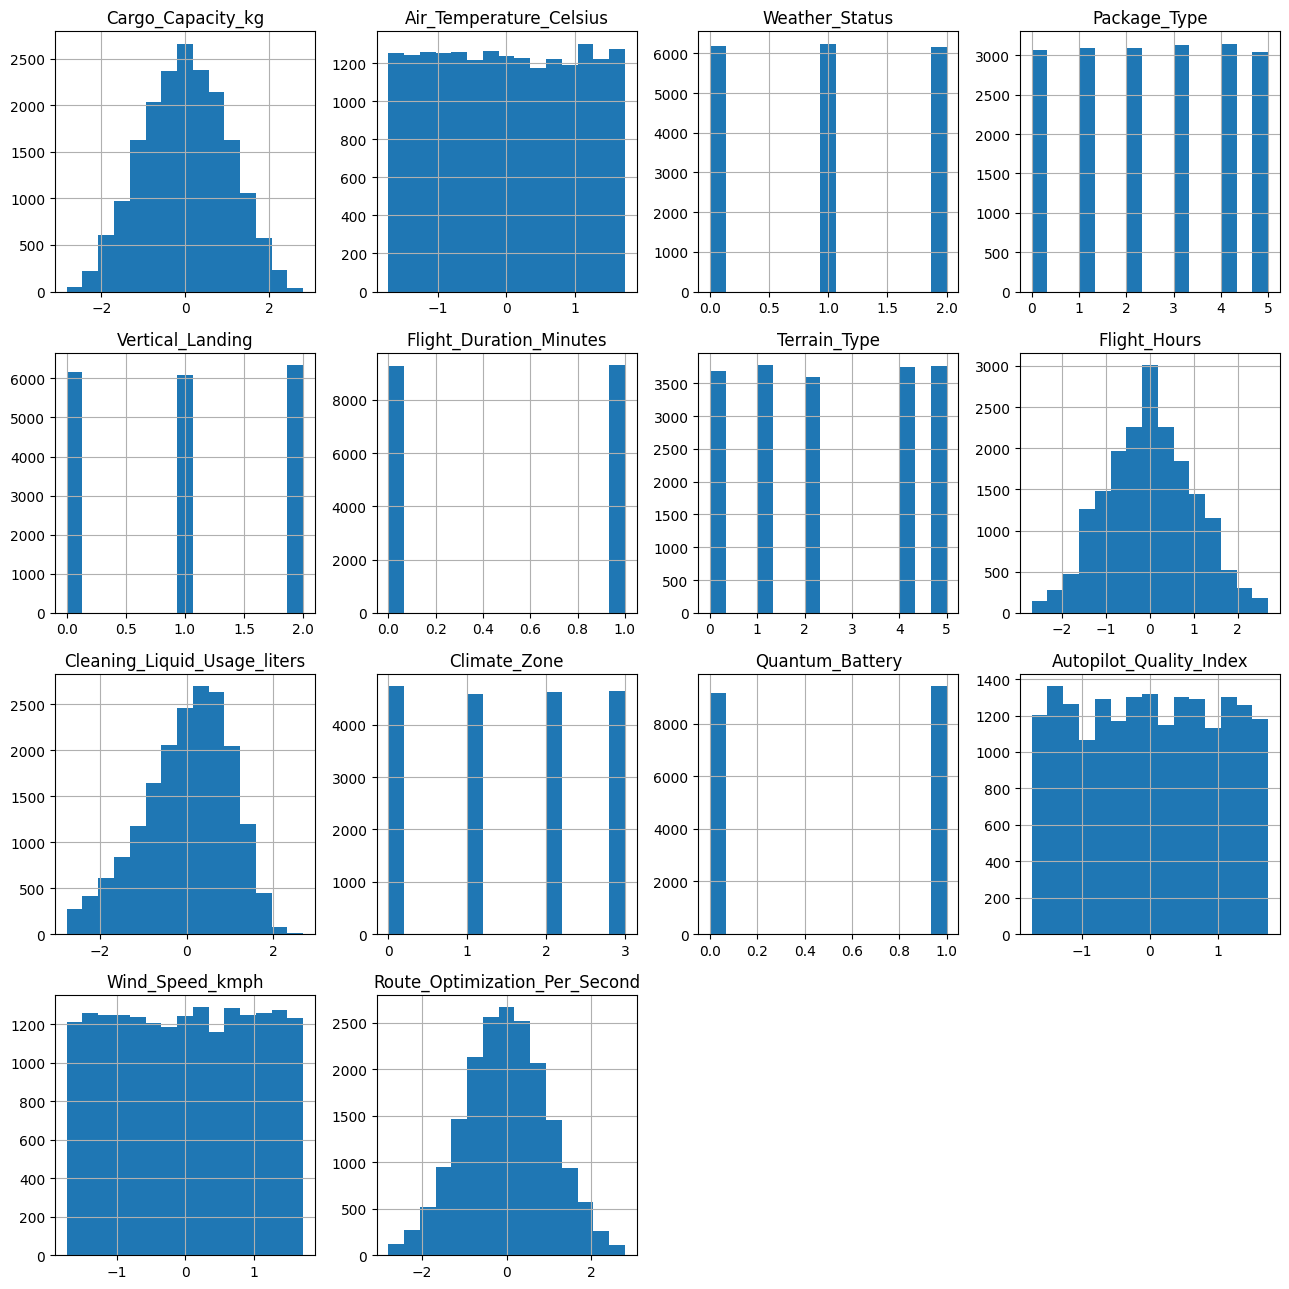

In [504]:
df_filled.hist(figsize=(13, 13), bins=15)
plt.tight_layout()
plt.show

**Interpretation**

* The imputation process did not distort the underlying distributions. Instead, it complemented the existing structure by estimating plausible values for missing data. 

* This approach minimizes the risk of bias and ensures the data is ready for further preprocessing or modeling.

## 4. Splitting into training and test data

The dataset is split into training and testing sets using **`train_test_split`**. 

The **`X`** variables represent features, while **`y`** is the target variable.

The **`test_size=0.2`** specifies that 20% of the data is reserved for testing, and **`random_state=42`** ensures reproducibility. 

The training and testing shapes are printed to verify the split proportions.

In [505]:
X = df_filled.drop('Cargo_Capacity_kg', axis=1)
y = df_filled['Cargo_Capacity_kg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (14872, 13)
X_test shape: (3719, 13)
y_train shape: (14872,)
y_test shape: (3719,)


**Interpretation**

* The **`train_test_split`** confirms the data is divided as intended, with 14,872 sampled in the training set and 3,719 in the test set.

### 4.1 Distribution of values in the training and test data

KSE (Kernel Density Estimation) plots are used to visualize the distributions of features in the training and test sets. The code iterates through all features, plots overlapping KSEs for both sets, and adjusts the layout to ensure clear visualization.

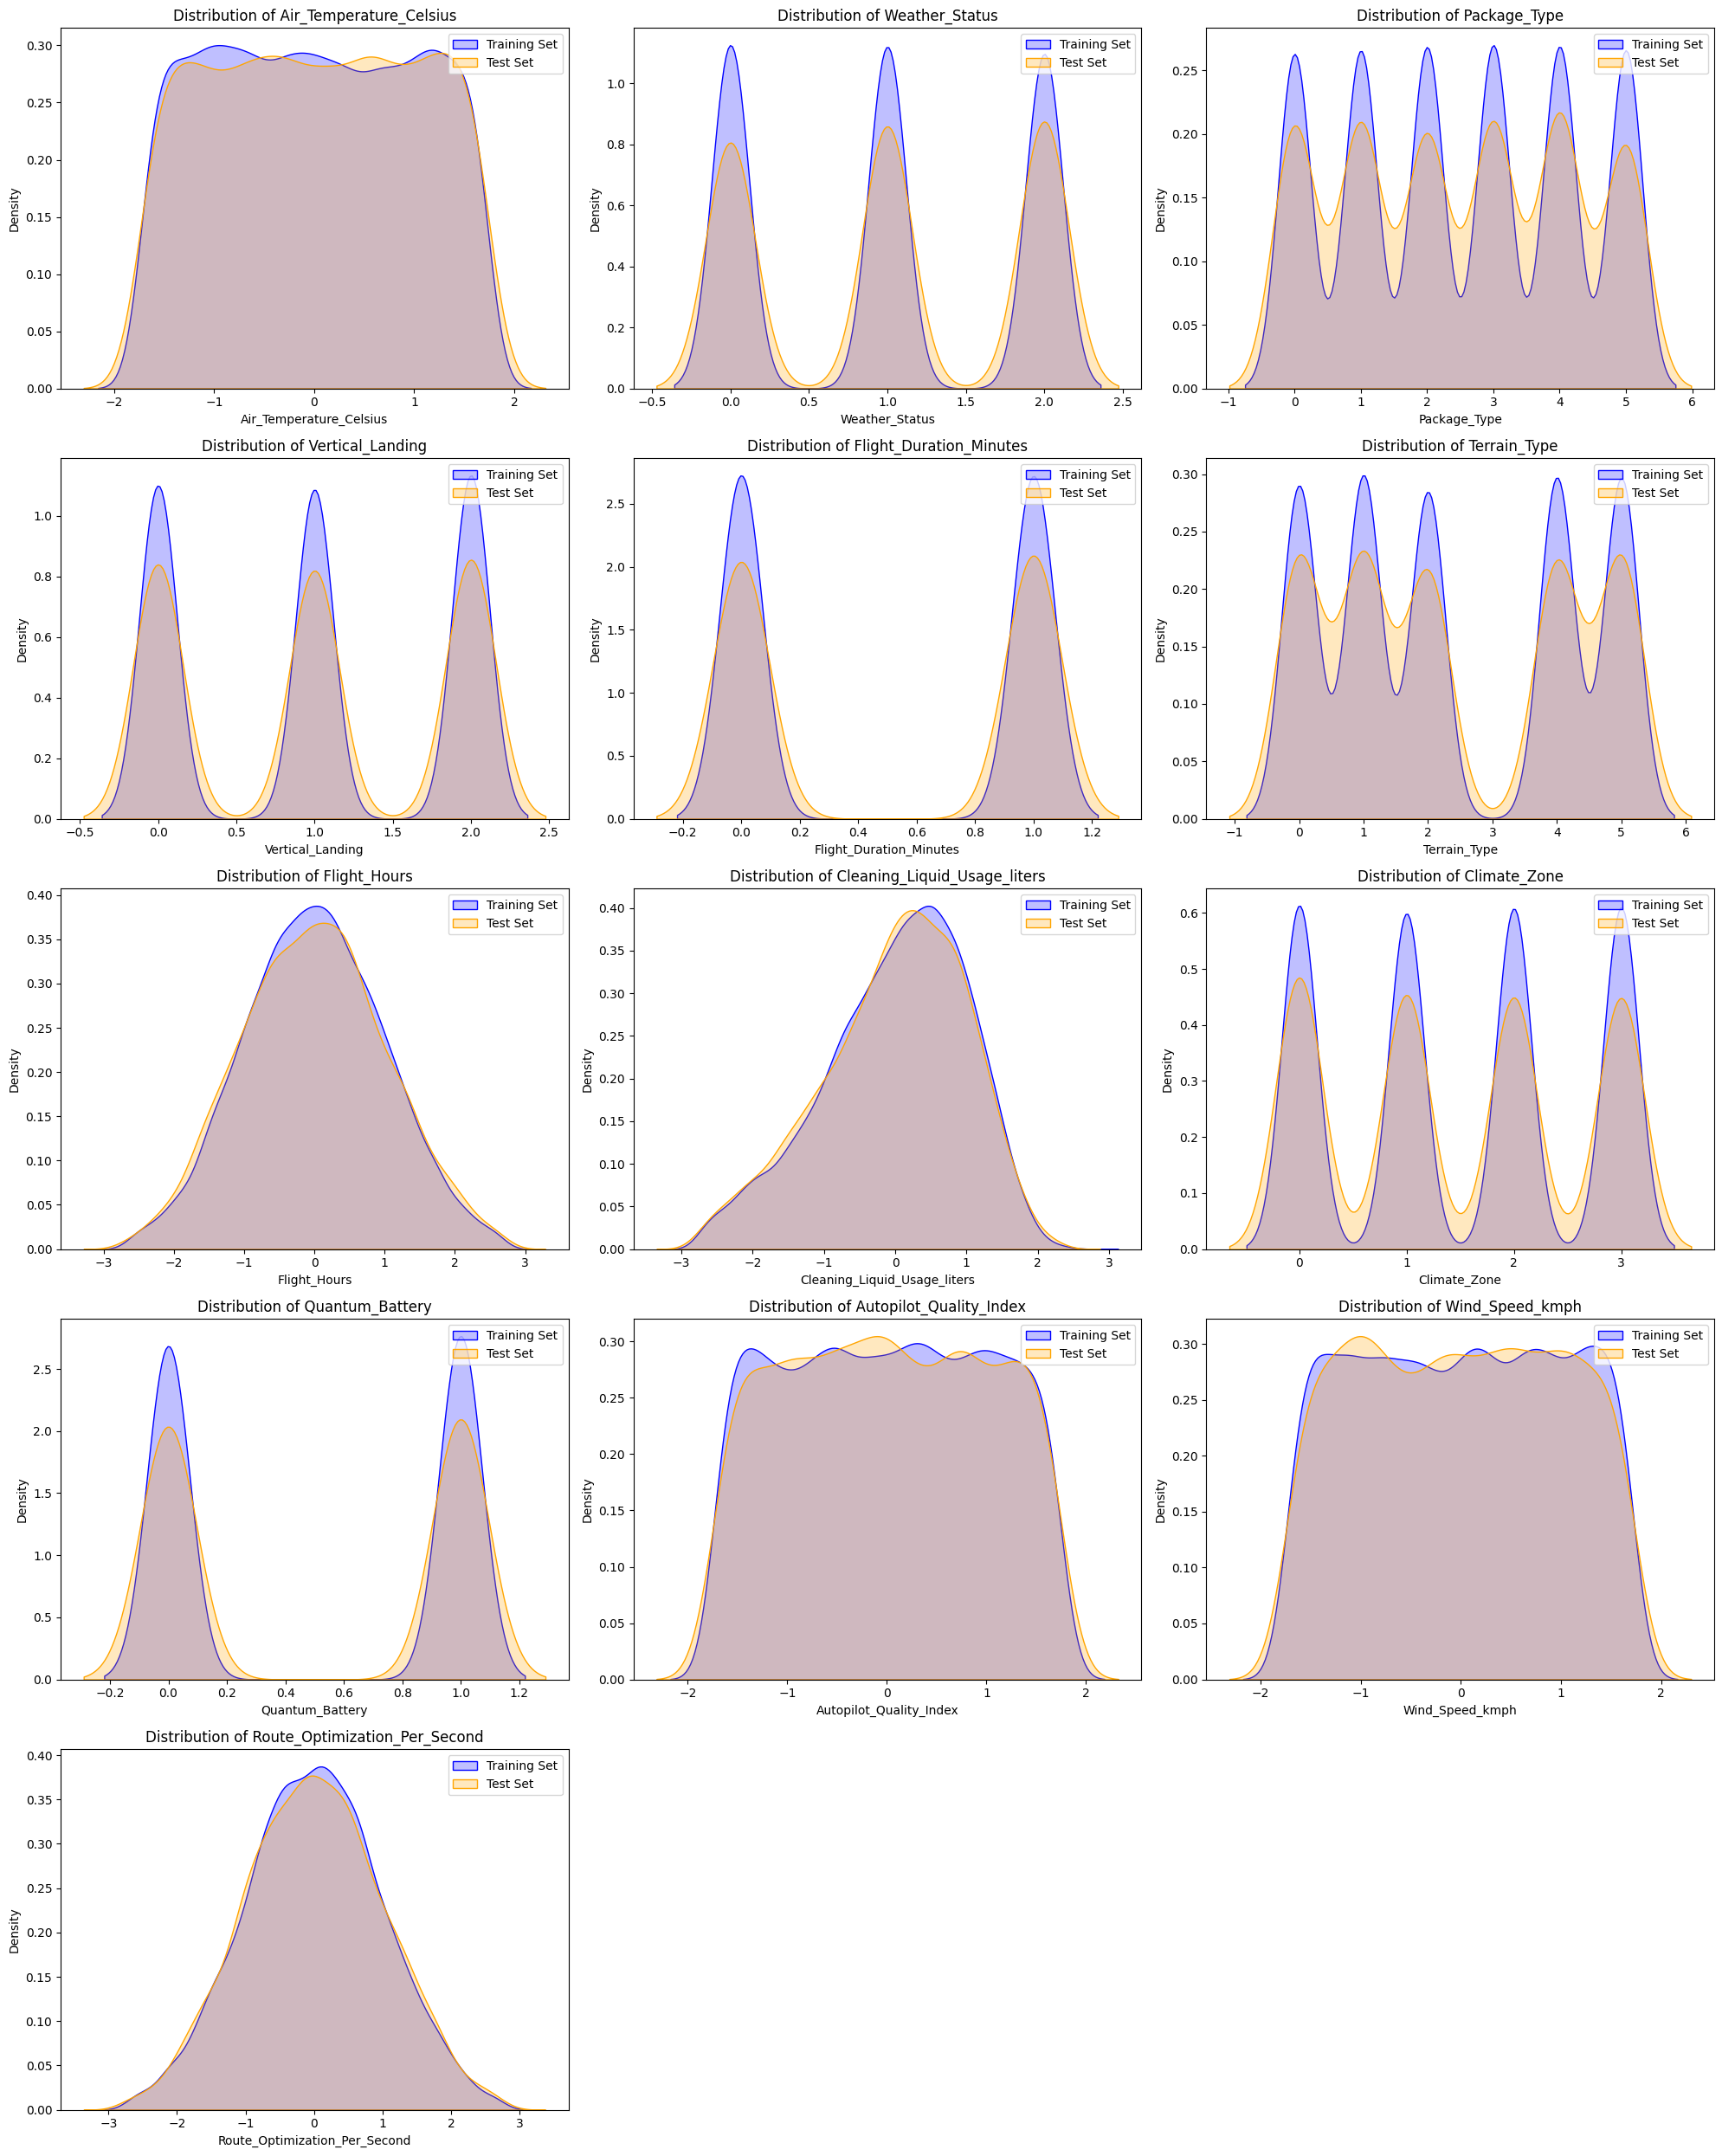

In [506]:
num_features = len(X_train.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, feature in enumerate(X_train.columns):
    sns.kdeplot(X_train[feature], label="Training Set", fill=True, ax=axes[i], color="blue")
    sns.kdeplot(X_test[feature], label="Test Set", fill=True, ax=axes[i], color="orange")
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].legend()
    
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

**Interpretation**

* The KDE plots indicate that the feature distributions in both sets align closely, suggesting an even split without significat sampling bias. 

* This ensures that the models trained on the training data will generalize well to the test data. 

* However, features like **`Vertical_Landing`** and **`Terrain_type`** show distinct peaks, reflecting categorical distributions, while others like **`Air_Temperature_Celsius`** are continuous and symmetric.

## 5. Model Building

<h5 style="color: #d6d1f8">A Regression Problem</h5>

This task was approached as a regression problem because the target variable, **Cargo_Capacity_kg**, is a continuous numerical value.

Regression models are specifically designed to predict continuous outcomes by learning the relationships between the input features and the target variable. Unlike classification, which deals with discrete categories, regression enables the prediction of a wide range of possible values, making it suitable for estimating quantities such as weight, price, or, in this case, the cargo caapacity of autonomous delivery drones. 

This choice aligns with the dataset structure and the objective of providing accurate numerical predictions, essential for operational and logistical planning in drone delivery systems.

### 5.1 Testing Different Models

1. **`Linear Regression`**

* A basic regression model that assumes a linear relationship between the input features and the target variable. It fits a straight line to minimize the residual sum of squares between observed and predicted values.

2. **`Random Forest Regressor`**

* An ensemble learning method that build multiple decision trees and average their predictions to improve accuracy and reduce overfitting. It is robust to outliers and captures complex relationships.

3. **`Gradient Boosting Regressor`**

* An iterative ensemble technique that builds trees sequentially, with each tree correcting errors of the previous ones. It focueses on minimizing the loss function, making it effective for complex datasets.

4. **`K-Nearest Neighbors Regressor`**

* A non-parametric model that predicts the target value of a data point by averaging the values of its k nearest neighbors in the feature space. 

5. **`Support Vector Regressor`**

* A regression model that uses the concept of support vectors and hyperplanes. It tries to fit the data within a margin of tolerance (epsilon) while minimizing errors outside this margin. It is effective for datasets with a high dimensional feature space.

#### 5.1.1 Computing the metrics and comparing

We define a dictionary **`models`** that holds several machine learning models for regression.

In [524]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regressor": SVR()
}
results = {}

Iterating through the models, training them on the dataset, and calculates the key metrics:

**`MSE (Mean Squared Error)`**: Measures the average squared differences between actual and predicted values.

**`MAE (Mean Absolute Error)`**: Measures the average absolute differences.

**`R^2 (Coefficient of Determination)`**: Indicates the proportion of the variance explained by the model.

**`Runtime`**: Captures the time each mocel takes for training and predictions.

Training Linear Regression...
Linear Regression -> MSE: 0.0870, MAE: 0.2357, R^2: 0.9123, Runtime: 0.05s
 


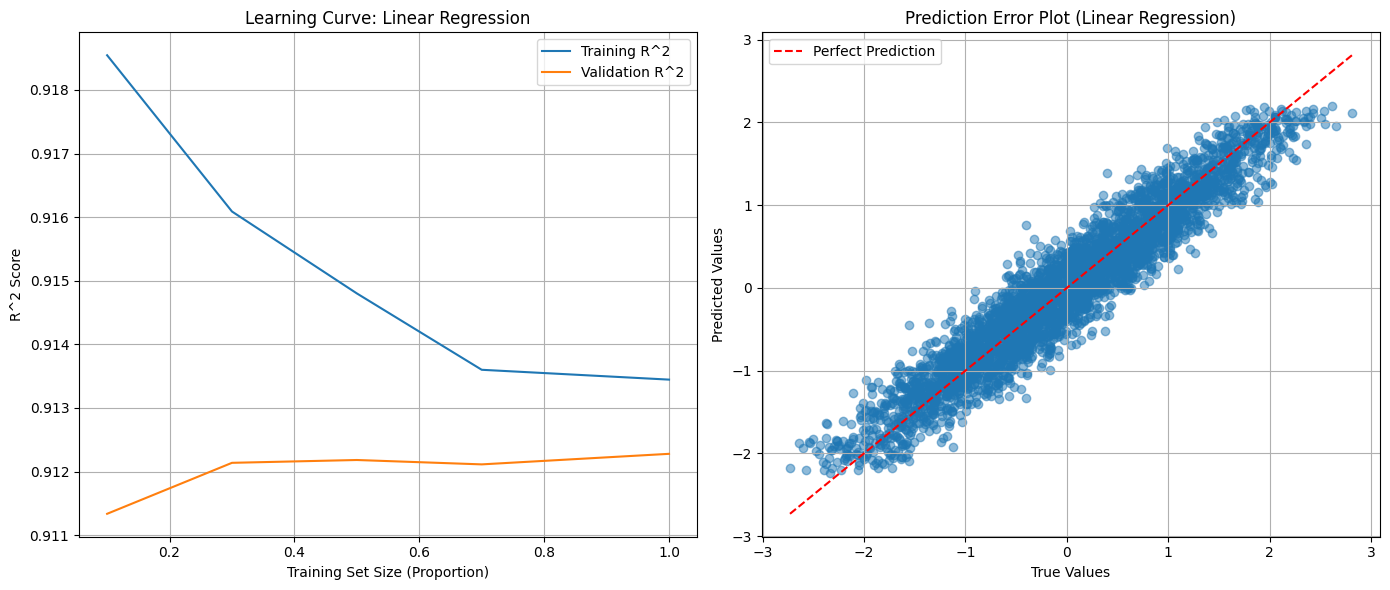

Training Random Forest...
Random Forest -> MSE: 0.0954, MAE: 0.2470, R^2: 0.9039, Runtime: 11.87s
 


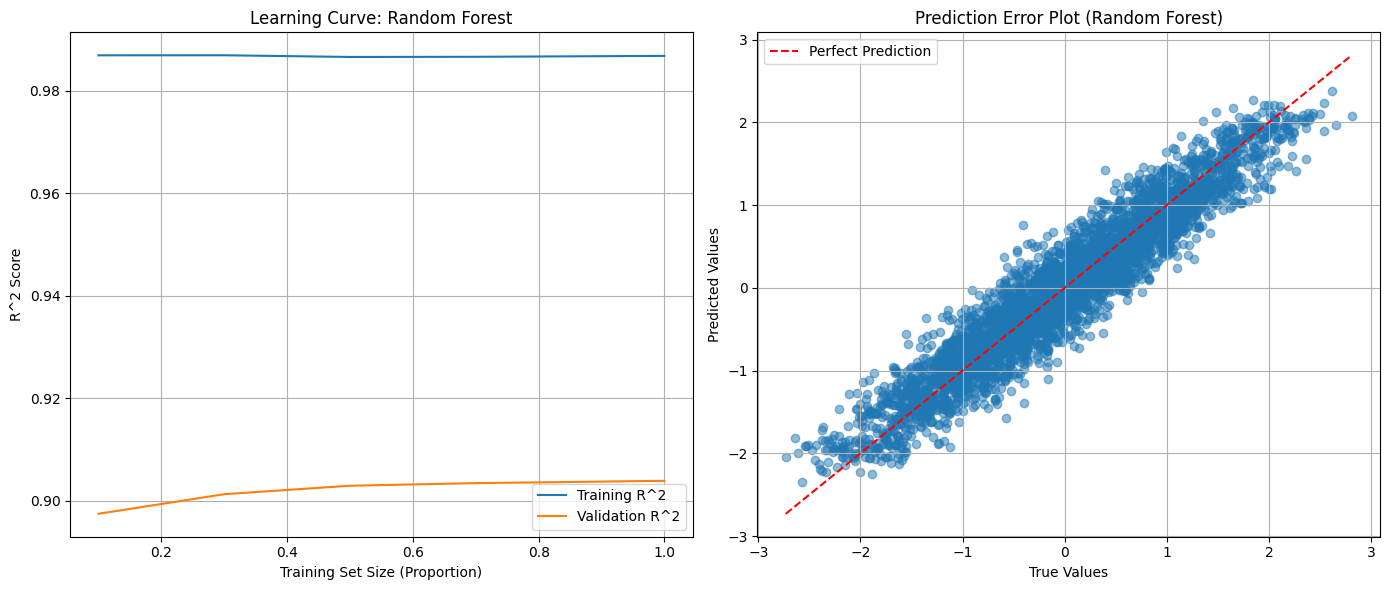

Training Gradient Boosting...
Gradient Boosting -> MSE: 0.0887, MAE: 0.2387, R^2: 0.9106, Runtime: 2.31s
 


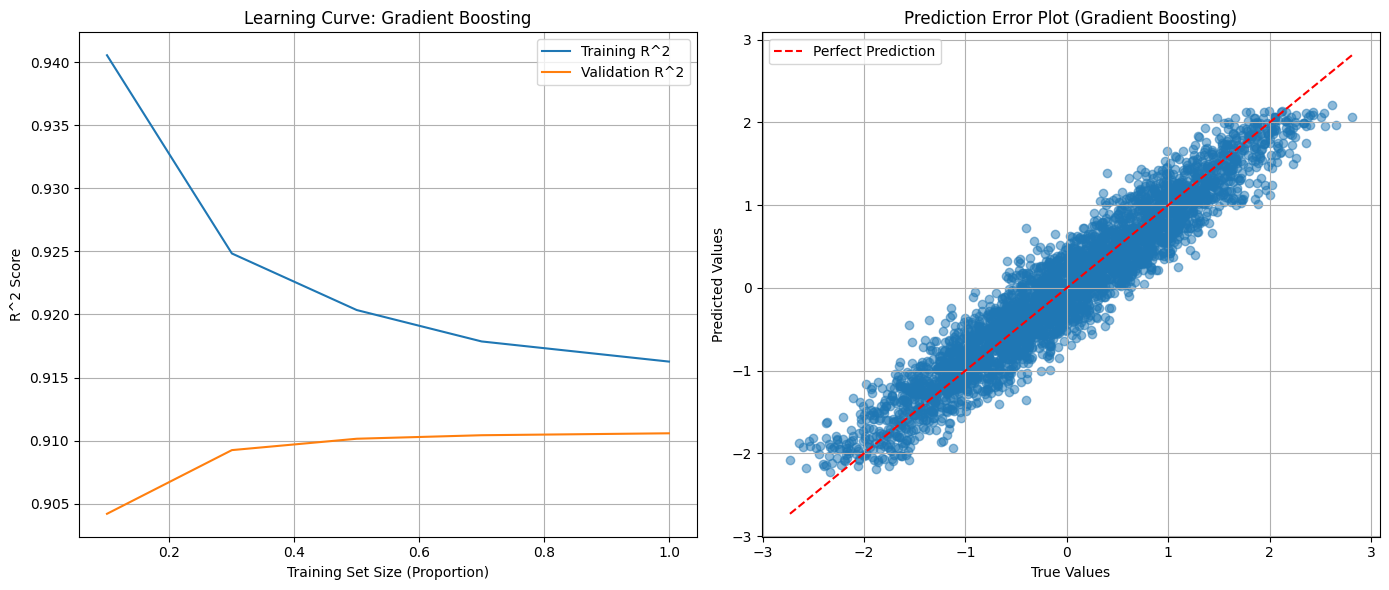

Training K-Nearest Neighbors...
K-Nearest Neighbors -> MSE: 0.2815, MAE: 0.4274, R^2: 0.7162, Runtime: 0.28s
 


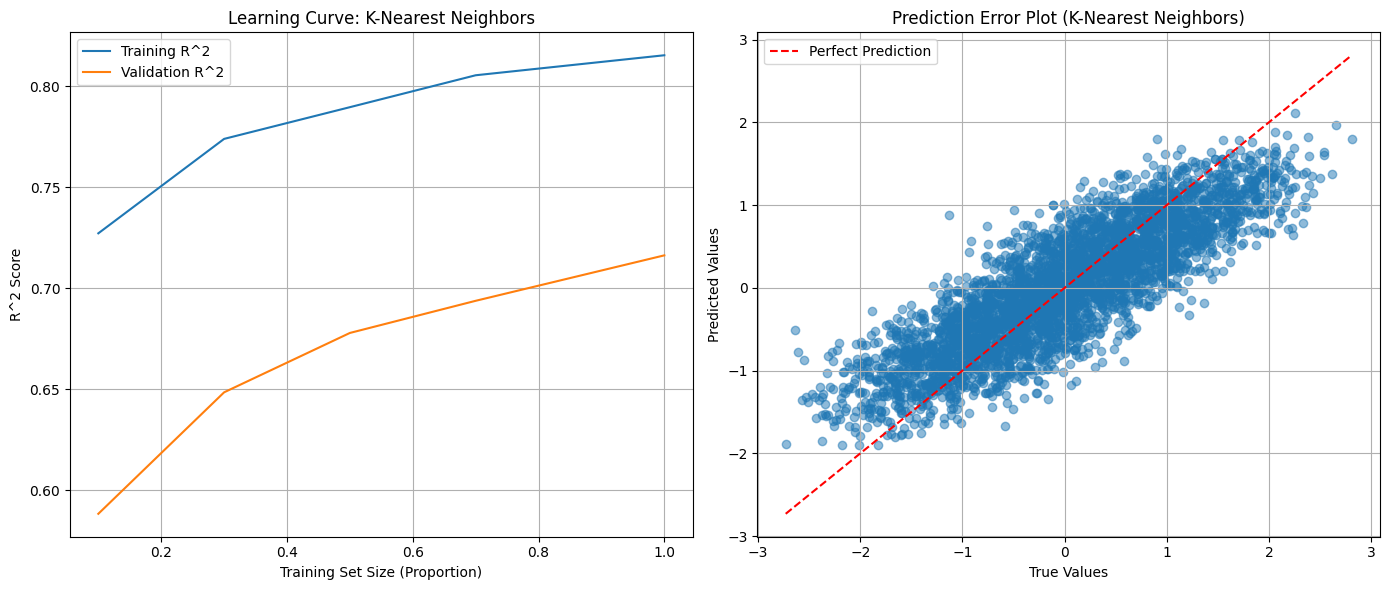

Training Support Vector Regressor...
Support Vector Regressor -> MSE: 0.0932, MAE: 0.2446, R^2: 0.9061, Runtime: 6.01s
 


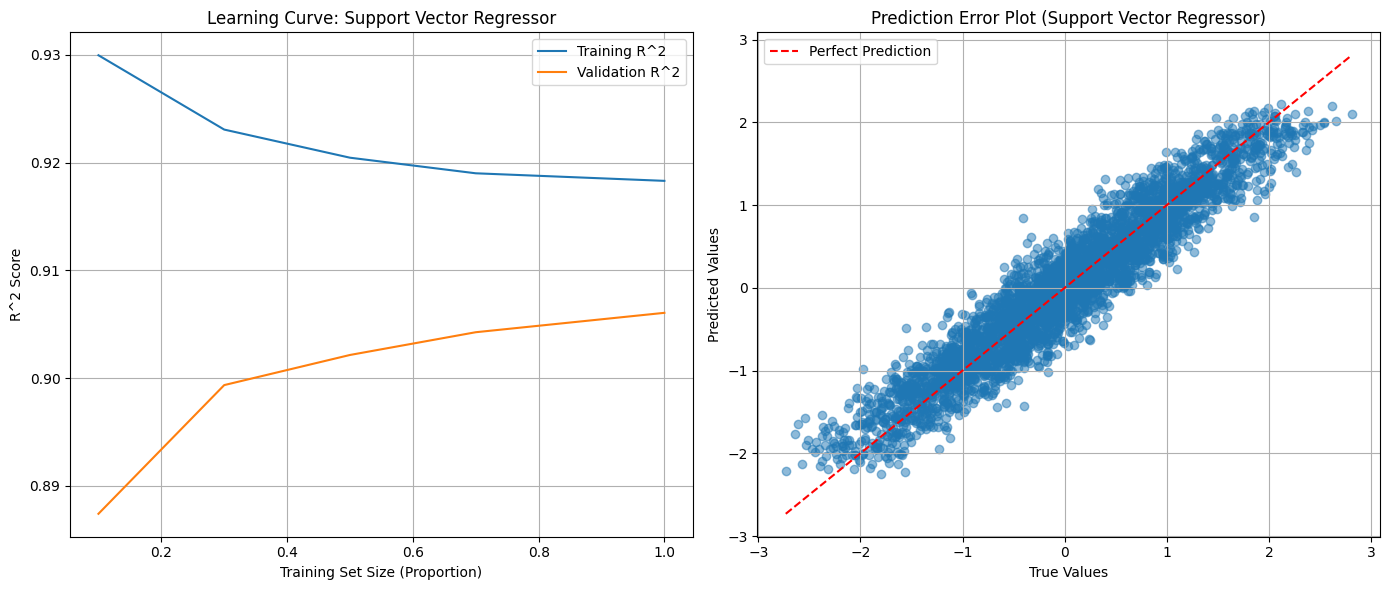

In [ ]:
for model_name, model in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # This ensures the test set is only used to evaluate the model's performance after it has been trained.
    
    runtime = time.time() - start_time
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        "MSE": mse,
        "MAE": mae,
        "R^2": r2,
        "Runtime (s)": runtime
    }
    
    print(f"{model_name} -> MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}, Runtime: {runtime:.2f}s\n ")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]
    train_scores = []
    val_scores = []
    
    for size in train_sizes:
        X_sample = X_train[:int(size * len(X_train))]
        y_sample = y_train[:int(size * len(y_train))]
        model.fit(X_sample, y_sample)
        train_scores.append(r2_score(y_sample, model.predict(X_sample)))
        val_scores.append(r2_score(y_test, model.predict(X_test)))
    
    axes[0].plot(train_sizes, train_scores, label="Training R^2")
    axes[0].plot(train_sizes, val_scores, label="Validation R^2")
    axes[0].set_title(f"Learning Curve: {model_name}")
    axes[0].set_xlabel("Training Set Size (Proportion)")
    axes[0].set_ylabel("R^2 Score")
    axes[0].legend()
    axes[0].grid()
    
    axes[1].scatter(y_test, y_pred, alpha=0.5)
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Prediction")
    axes[1].set_title(f"Prediction Error Plot ({model_name})")
    axes[1].set_xlabel("True Values")
    axes[1].set_ylabel("Predicted Values")
    axes[1].legend()
    axes[1].grid()
    
    plt.tight_layout()
    plt.show()

**Interpretation**

1. Learning Curves:

* A steep training curve suggests overfitting if it is much better than validation.
* Gradient Boosting and Linear Regression show relatively balanced training/validation curves, indicating good generalization.
* KNN shows high overfitting, with a significant gap between training and validation R^2.

2. Prediction Error Plots:

* Models with points close to the diagonal red line perform better.
* Points scattered far from the line suggests worse predictions.

Aggregating the results from all models into a DataFrame. It sorts and displays them by R^2 in descending order, providing a direct comparison of their perofmances.

In [536]:
results_df = pd.DataFrame(results).T
results_df.index.name = "Model"
results_df = results_df.reset_index()

results_df = results_df.sort_values(by="R^2", ascending=False)
print("Model Comparison:")
results_df

Model Comparison:


Model       MSE       MAE       R^2  Runtime (s)
0         Linear Regression  0.087008  0.235744  0.912279     0.046274
2         Gradient Boosting  0.088692  0.238655  0.910581     2.306919
4  Support Vector Regressor  0.093182  0.244570  0.906054     6.013612
1             Random Forest  0.095361  0.246997  0.903857    11.870706
3       K-Nearest Neighbors  0.281488  0.427366  0.716206     0.282133

**Interpretation**

* **`Linear Regression`** performs best in terms of R^2 (0.9123) and runtime (0.046) seconds, making it efficient and effective.

* **`Gradient Boosting`** has slightly lower R^2 but is robust for capturing nonlinear relationships.

* **`SVR`** performs comparably but takes londer to run.

* **`Random Forest`** performs moderately but has higher computational costs.

* **`KNN`** shows the worst performance due to overfitting, with significantly lower R^2.

#### 5.1.2 Visualizing if the continuous values have a linear relationship with the target value

The code creates scatterplots to visualize the relationship between each continuous feature and the target variable (**`y_train`**). It loops through all continuous columns in the training dataset, plotting each feature against the target.

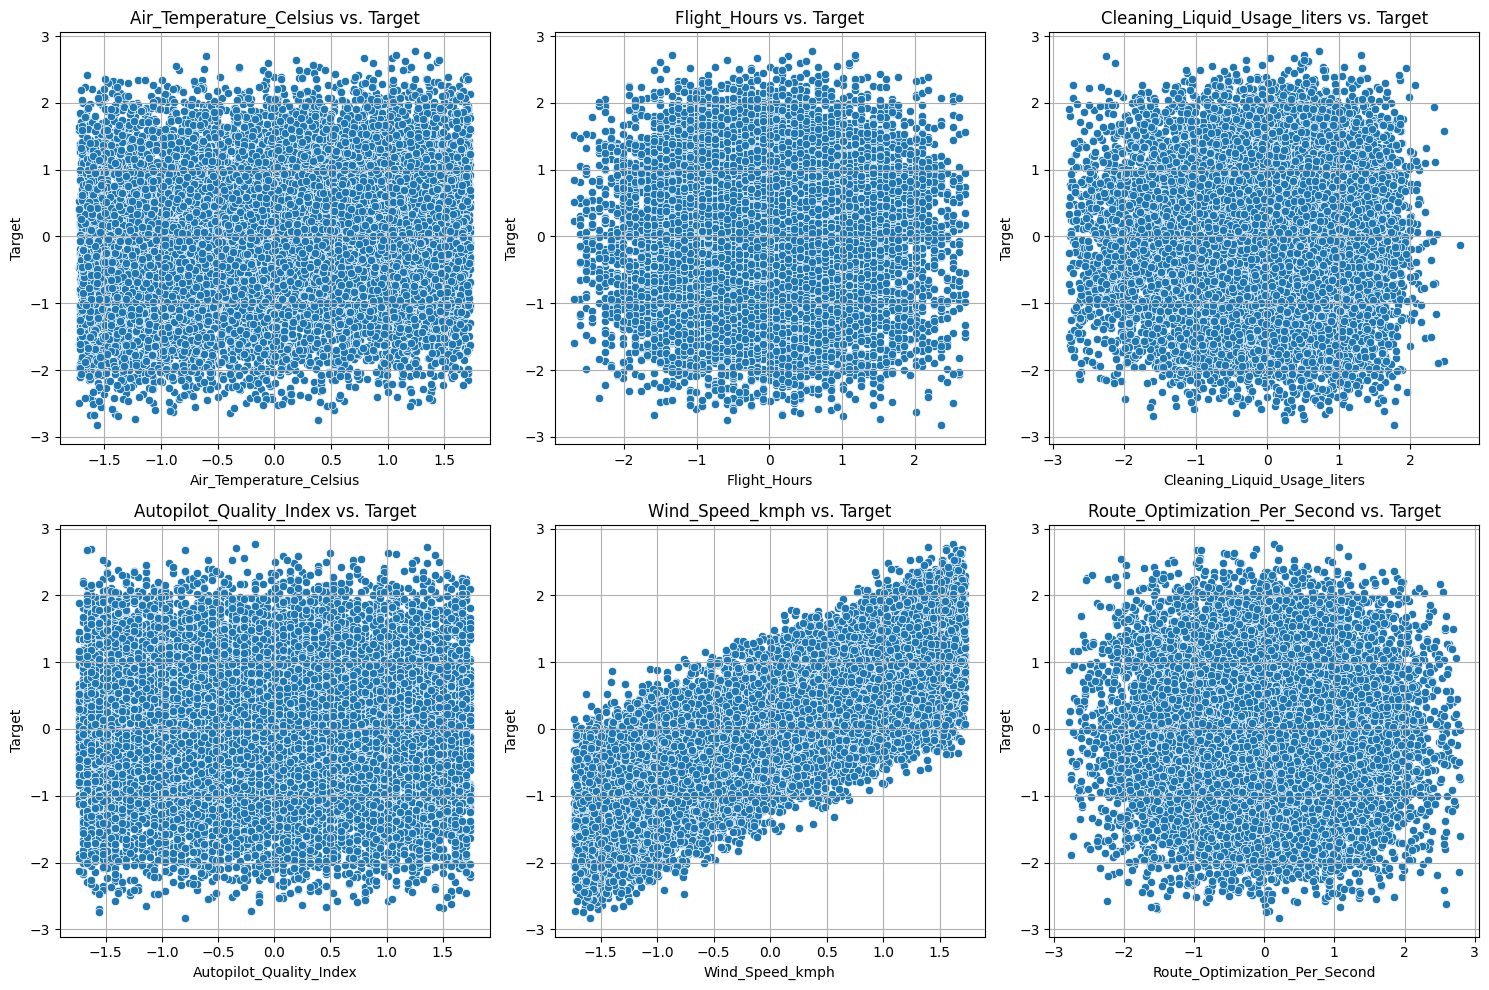

In [555]:
continuous_columns = [col for col in X_train.select_dtypes(include=['float64', 'int64']).columns if X_train[col].nunique() > 10]

num_columns = 3
num_rows = (len(continuous_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()
for i, column in enumerate(continuous_columns):
    sns.scatterplot(ax=axes[i], x=X_train[column], y=y_train)
    axes[i].set_title(f"{column} vs. Target")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Target")
    axes[i].grid()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**Interpretation**

The scatterplots show that most features lack a strong linear relationship with the target variable, as the points are scattered uniformly. Specifically:

1. *Air Temperature*, *Flight Hours*, *Cleaning Liquid Usage*, *Autopilot Quality*, and *Route Optimization*: The data points are distributed without any discernible pattern, suggesting no clear linear correlation with the target.

2. *Wind Speed (kmph)*: This feature shows a visible pattern where the target value increases with wind speed, indicating a potential linear or non-linear correlation.

This confirms that Linear Regression is not suitable for accurately predicting the target variable in this dataset and will be used only as a baseline model.

### 5.2 Choosing the best models

##### 1. Gradient Boosting

**Why was it chosen?**

Gradient Boosting is a powerful ensemble learning technique that build models sequentially, minimizing errors at each step. It was chosen because:

* It captures complex, non-linear relationships in the data.

* The model has shown robust performance with low MSE and high R^3 scores during cross-validation.

* It is less prone to overfitting than Random Forest in some scenarios due to its iterative training process.

##### 2. Support Vector Regressor (SVR)

**Why was it chosen?**

SVR uses kernel function to model non-linear relationships effectively. It was chosen because:

* It is capable of finding a balance between bias and variance by defining margins for the predictions.

* The model performed well in terms of accuracy ad R^2 scores, proving its suitability for this dataset.

* It can handle outliers better than simpler regression techniques.

##### 3. Linear Regression (as a baseline)

**Why was it chosen?**

Linear Regression was included as a baseline model for comparison purposes. It was chosen because:

* It is straightforward, interpretable, and computationally efficient.

* Despite its simplicity, it provides a benchmark to evaluate the performance of more complex models.

* The scatterplots demonstrated that most features lack linear relationships with the target, confirming its limited utility but making it ideal for baseline evaluation.

##### Why not the others?

* *Random Forest*: While Random Forest is a strong model, it requires more computational resources and showed slightly inferior performance compared to Gradient Boosting and SVR.

* *K-Nearest Neighbors(KNN)*: KNN performed poorly with the highest MSE and lowest R^2, indicating its inability to capture the complexities of the dataset. Additionally, its performace degrades with high-dimensional data.

### 5.3 Hyperparameter Tuning for Gradient Boosting Regression

#### 5.3.1 Define the Hyperparameter Grid

In the first step, a hyperparameter grid for the Gradient Boostig model is defined (**`param_grid`**). It includes possible values for parameters such as the number of estimators (**`n_estimators`**), learning_rate (**`learning_rate`**), maximum depth of the trees (**`max_depth`**), and others.

In [580]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

**The parameters chosen**

* **`n_estimators`**: This represents the number of boosting stages (or trees). A higher number allows the model to learn more complex patterns but can lead to overfitting if too large.

* **`learning_rate`**: Conrols the contribution of each tree to the final prediction. Smaller values reduce overfitting and require more estimators for good performance.

* **`max_depth`**: Limits the maximum depth of individual trees, controlling how complex each tree can be. Shallower trees help prevent overfitting.

* **`min_samples_split`**: The minimum umber of samples required to split an internal node. Larger values result in less complex trees.

* **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Higher values make the trees more robust by reducing overfitting.

#### 5.3.2 Initialize GridSearchCV

The code initializes a  **`RandomizedSearchCV`** object for hyperparameter tuning of the **`GradientBoostingRegressor`**. Here's what each parameter does:

* **`estimator`**: Specifies the model, in this case, GradientBoostingRegressor.

* **`param_distributions`**: The hyperparameter grid defined earlier (param_grid) that included values to sample during the search.

* **`n_iter`**: The number of random combinations of hyperparameters to try (100 iterations here).

* **`scoring='r2'`**: The performance metric used is the R^2 score.

* **`cv=5`**: Performs 5-fold cross-validation for each parameter combination.

* **`random_state=42`**: Ensures reproducibility of the results.

* **`n_jobs=-1`**: Utilizes all available CPUs for computation.

* **`verbose=1`**: Controls the amount of output during the execution.

In [588]:
random_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=100,
    scoring='r2',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

#### 5.3.3 Fit the model

The best model and hyperparameters are then selected using **`radom_search_gb.best_params_`** and evaluated on the test set.

In [589]:
random_search_gb.fit(X_train, y_train)

print("Best Parameters:", random_search_gb.best_params_)
print("Best Cross-Validation R^2:", random_search_gb.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


Python(21022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21023) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21024) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21025) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21026) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21027) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21028) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(21029) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Best Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_depth': 3, 'learning_rate': 0.05}
Best Cross-Validation R^2: 0.9115428485562103


**Interpretation**

1. **`n_estimators`**: 200

This means the model uses 200 boosting iterations (or trees). Increasing the number of estimators can improve model performance but also increases computational time. A value of 200 strikes a balance between accuracy and efficiency.

2. **`min_samples_split`**: 15

Specifies the minimum number of samples required to split an internal node. By setting it to 15, the model avoids overfitting by ensuring splits are only performed sufficiently large groups of data.

3. **`min_samples_leaf`**: 6

This is the minimum number of samples required to be in a leaf node. Setting it to 6 reduces the likelihood of the model learing overly specific patterns (overfitting) and encourages more generalized splits.

4. **`max_dept`**: 3

Limits the maximum depth of each tree to 3 levels. This helps the model maintain simplicity and prevents overfitting by not learning overly complex patterns.

5. **`learning_rate`**: 0.05

Controls the contribution of each tree to the final prediction. A smaller learning rate (0.05) slows down the learning process, allowing the model to build more robust trees by minimizing the chance of overfitting.

#### 5.3.4 Evaluate on the Test Set

In [590]:
best_gradient_model = random_search_gb.best_estimator_
y_test_pred_gb = best_gradient_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_test_pred_gb)
mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
r2_gb = r2_score(y_test, y_test_pred_gb)

print(f"Gradient Boosting (Test Set) -> MSE: {mse_gb:.4f}, MAE: {mae_gb:.4f}, R^2: {r2_gb:.4f}")

Gradient Boosting (Test Set) -> MSE: 0.0882, MAE: 0.2381, R^2: 0.9111


**Interpretation**

On the test set, the model performed with an MSE of **`0.0882`**, MAE of **`0.2381`**, ad an R^2 of **`0.9111`**.

The model's test set results validate its effectiveness and confirm that the chosen hyperparameters generalize well.

### 5.4 Hyperparameter Tuning for SVR

#### 5.4.1 Define the Parameter Grid

The **`param_grid_svr`** dictionary defines the hyperparameter space for tuning the SVR.

In [562]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

**The parameters chosen**

* **`C`**: Regularization parameter. A smaller value of C allows for a larger margin, but may increase bias, while a larger value of C reduces margin for a better fit but may risk overfitting. Values like 0.1, 1, 10, 100 are tested.

* **`epsilon`**: Defines the margin of tolerance where no penalty is given in the training loss function. Smaller values are more sensitive to deviations from actual values. Values like 0.001, 0.01, 0.1, 1 are tested.

* **`kernel`**: Specifies the kernel type to be used in the algorithm
    * *linear*: A linear kernel assumes linear relationships in the data
    * *rbf*: Radial Basis Function kernel is flexible and works well with non-linear data.
    * *poly*: Polynomial kernel can capture complex relationships.

#### 5.4.2 Initialize RandomizedSearchCV

This initializes a hyperparameter seach over the SVR model:

* **`estimator=SVR()`**: Defines the base model (SVR) to tune.

* **`param_distributions=param_grid_svr`**: Uses the grid of parameters defined earlier.

* **`n_iter=20`**: The search will test 20 random combinations of the parameter grid.

* **`scoring='r2'`**: The performance metric used is the R^2 score.

* **`cv=5`**: Performs 5-fold cross-validation for each parameter combination.

* **`random_state=42`**: Ensures reproducibility of the results.

* **`n_jobs=-1`**: Utilizes all available CPUs for computation.

* **`verbose=2`**: Provides detailed output during the search.

In [563]:
random_search = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=param_grid_svr,
    n_iter=20,
    scoring='r2',
    cv=5,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

#### 5.4.3 Fit the Model

The **`random_search.fit(X_train, y_train)`** code trains the model by:

* Running 20 iterations of hyperparameter combinations.

* For each combination, 5-fold cross-validation is conducted on the training data to compute the R^2 score.

* The best hyperparameters and corresponding cross-validated R^2 score are identified.

The print statements output the best parameters and cross-validation results, such as:

* Best Parameters for SVR

* Best Cross-Validation R^2

In [576]:
random_search.fit(X_train, y_train)

print("Best Parameters for SVR:", random_search.best_params_)
print("Best Cross-Validation R^2 for SVR:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Python(19744) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(19745) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(19746) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(19747) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(19748) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(19749) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(19750) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(19751) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END ..................C=10, epsilon=0.01, kernel=linear; total time= 3.1min
[CV] END ..................C=10, epsilon=0.01, kernel=linear; total time= 3.2min
[CV] END ..................C=10, epsilon=0.01, kernel=linear; total time= 3.2min
[CV] END ..................C=10, epsilon=0.01, kernel=linear; total time= 3.2min
[CV] END ..................C=10, epsilon=0.01, kernel=linear; total time= 3.2min
[CV] END ...................C=10, epsilon=0.001, kernel=poly; total time= 1.0min
[CV] END ...................C=10, epsilon=0.001, kernel=poly; total time= 1.1min
[CV] END ...................C=10, epsilon=0.001, kernel=poly; total time= 1.1min
[CV] END ...................C=10, epsilon=0.001, kernel=poly; total time= 1.2min
[CV] END ...................C=10, epsilon=0.001, kernel=poly; total time= 1.3min
[CV] END ....................C=100, epsilon=0.01, kernel=rbf; total time= 5.8min
[CV] END ....................C=100, epsilon=0.01, kernel=rbf; total time= 6.1min
[CV] END ...................

**Interpretation**

The best parameters indicate:

* **`Kernel`**: 'linear' was optimal, meaning the relationship between predictors and the target is sufficiently linear.

* **`C:`** 1, which provides a balance between margin size and fitting accuracy.

* **`Epsilon`**: 0.01, a small margin of tolerance, indicating the model is sensitive to deviations in predictions.

The cross-validation R^2 score of 0.913 shows the model generalizes well on unseen data, with high accuracy.

#### 5.4.4 Evaluate on the Test Set

In [577]:
best_svr_model = random_search.best_estimator_
y_test_pred_svr = best_svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_test_pred_svr)
mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
r2_svr = r2_score(y_test, y_test_pred_svr)

print(f"SVR (Test Set) -> MSE: {mse_svr:.4f}, MAE: {mae_svr:.4f}, R^2: {r2_svr:.4f}")

SVR (Test Set) -> MSE: 0.0869, MAE: 0.2355, R^2: 0.9124


**Interpretation**

* MSE: **`0.0869`** indicates low average squared error.

* MAE: **`0.2355`** suggests predictions are off by about 0.2355 units on average.

* R^2: **`0.9124`** confirms the model explains 91.24% of the variance in the target variable.

These metrics show that the SVR model is well-tuned and performs similarly on both training and test datasets, indicating minimal overfitting.

### 5.5 Evaluation for Linear Regression

A simple Linear Regression model is trained and evaluated on the test set without hyperparameter tuning, as it does not have tunable hyperparameters. The performance metrics are calculates similarly using MSE, MAE, and R^2.

In [659]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_test_pred_lr = linear_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_test_pred_lr)
mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"Linear Regression (Test Set) -> MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, R^2: {r2_lr:.4f}")

Linear Regression (Test Set) -> MSE: 0.0870, MAE: 0.2357, R^2: 0.9123


**Interpretation**

* The Linear Regression model achieved comparable performance to the other models, with an MSE **`0.0870`**, MAE of **`0.2357`**, and an R^2 of **`0.9123`**. 

* This suggests that even without advanced techniques, linear regression is a strong baseline for this dataset.

### 5.5 Compare the Results

In [660]:
comparison_results = pd.DataFrame({
    "Model": ["Linear Regression", "Gradient Boosting", "SVR"],
    "MSE": [mse_lr, mse_gb, mse_svr],
    "MAE": [mae_lr, mae_gb, mae_svr],
    "R^2": [r2_lr, r2_gb, r2_svr]
})

print("Model Comparison:")
comparison_results

Model Comparison:


Model       MSE       MAE       R^2
0  Linear Regression  0.087008  0.235744  0.912279
1  Gradient Boosting  0.088211  0.238091  0.911066
2                SVR  0.086908  0.235548  0.912380

**Interpretation**

* The results show that SVR performs slightly better than both Gradient Boosting and Linear Regression, with the lowest MSE, lowest MAE, and the highest R^2.

* Linear Regression performs suprisingly well, almost matching SVR in R^2, but its MSE and MAE are sligtly higher. 

* Gradient Boostig, while effective, has slighlty higher error metrics and a marginally lower R^2, indicating it may not capture the underlying data patterns as effectively as SVR.

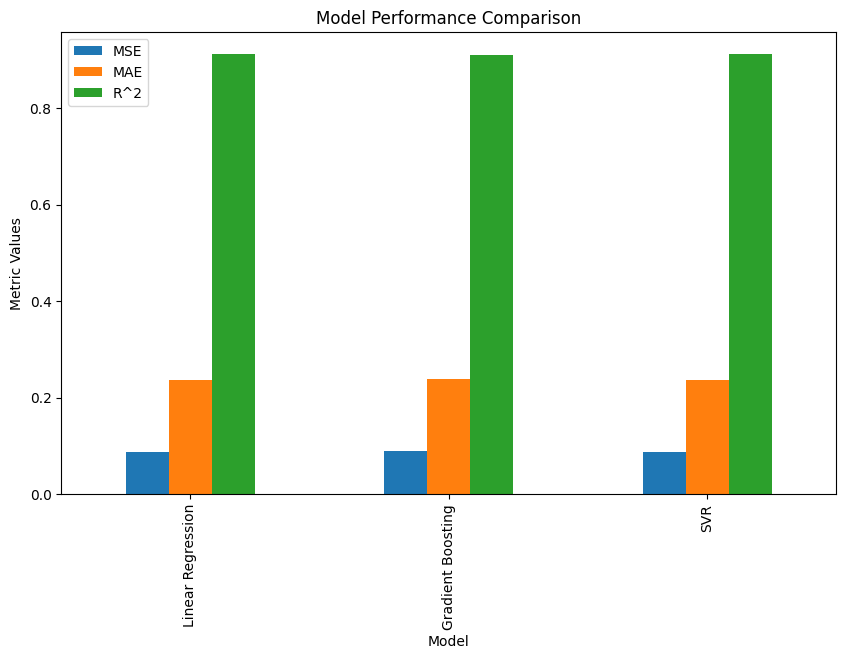

In [661]:
comparison_results.plot(
    x="Model",
    kind="bar",
    figsize=(10, 6),
    title="Model Performance Comparison"
)
plt.ylabel("Metric Values")
plt.show()

**Interpretation**

The bar chart visualizes the performance metrics for the three models.

* SVR has the lowest MSE and MAE, confirming it makes the smallest prediction errors among the three models. It also has the highest R^2, indicating it explains the variance in the target variable better than the others.

* Linear Regression performs almost as well as SVR, with comparable R^2 and slightly higher error metrics. 

* Gradient Boosting, while effective, shows slightly higher MSE and MAE, suggesting it may not generalize as well as the other models for this dataset.

#### 5.5.1 Residual Plots

Residual plots help evaluate how well a model's predictions align with the actual data. They plot the residuals (differences between predicted and actual values) against the predicted values. Residuals should ideally have no discernible pattern and be centered around zero.

This indicates that the model captures the data effectively and that errors are randomly distributed. Using residual plots is essential to check for non-linearity, and any systematic bias in the predictions.

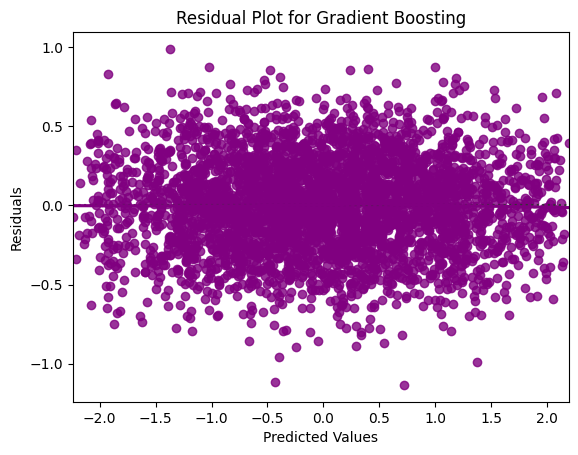

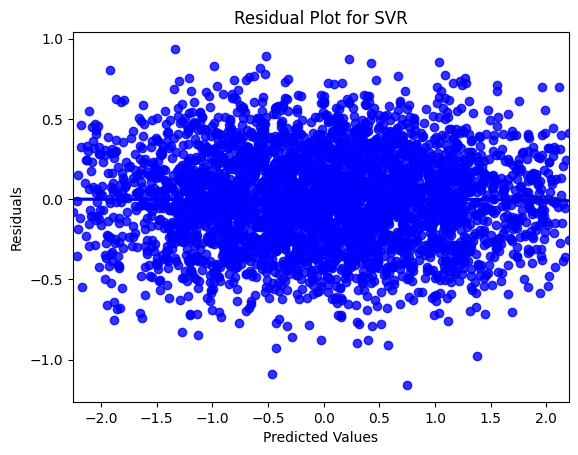

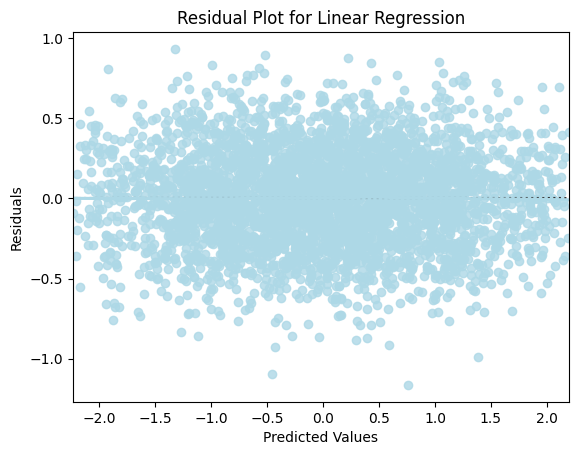

In [662]:
residuals_gb = y_test - y_test_pred_gb
sns.residplot(x=y_test_pred_gb, y=residuals_gb, lowess=True, color='purple')
plt.title('Residual Plot for Gradient Boosting')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

residuals_svr = y_test - y_test_pred_svr
sns.residplot(x=y_test_pred_svr, y=residuals_svr, lowess=True, color='blue')
plt.title('Residual Plot for SVR')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

residuals_lr = y_test - y_test_pred_lr
sns.residplot(x=y_test_pred_lr, y=residuals_lr, lowess=True, color='lightblue')
plt.title('Residual Plot for Linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Interpretation**

1. *Gradient Boosting*: The residuals are distributed relatively evenly around zero, with no visible pattern. This indicates that the model captures the data structure well, though some variance in prediction errors is noticeable.

2. *SVR*: The SVR residual plot also shows residuals scattered evenly around zero with minimal structure or pattern, suggesting that the model predictions align well with the actual data. The dispersion of residuals is slightly more concentrated compared to Gradient Boosting, indicating consistent prediction behavior.

3. *Linear Regression*: The residuals for linear regression are evenly distributed around zero, similar to the other two models. However, since linear regression assumes a linear relationship, any slight deviations might indicate that this assumption may not fully capture the complexity of the data.

Overall, all three models show acceptable residual distributions, but Gradient Boosting and SVR may handle complex data patterns slightly better than Linear Regression due to heir more advanceed architectures.

### 5.6 Training and evaluating the models after Hyperparameter Tuning

* This code defines the models (**`Gradient Boosting`**, **`SVR`**, and **`Linear Regression`**) with their best hyperparameters obtained during the tuning process.

* **`results_with_best_params`** is initialized as an empty dictionary to store the metrics for each model.

In [663]:
models_with_best_params = {
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        min_samples_split=15,
        min_samples_leaf=6,
        random_state=42,
    ),
    "SVR": SVR(
        kernel='linear',
        C=1,
        epsilon=0.01
    ),
    "Linear Regression": LinearRegression()
}

results_with_best_params = {}

The function **`plot_learning_curve`** visualizes the relationship between training set size and model performance on training and validation data.

The resulting plot shows how the model's perfomance varies as the training set size increases, helping to detect underfitting or overfitting.

In [655]:
def plot_learning_curve(model, model_name, X_train, y_train, X_test, y_test):
    train_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]
    train_scores = []
    test_scores = []
    
    for size in train_sizes:
        X_sample = X_train[:int(size * len(X_train))]
        y_sample = y_train[:int(size * len(y_train))]
        model.fit(X_sample, y_sample)
        
        train_pred = model.predict(X_sample)
        test_pred = model.predict(X_test)
        train_scores.append(r2_score(y_sample, train_pred))
        test_scores.append(r2_score(y_test, test_pred))
        
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores, label='Training Accuracy', marker='o')
    plt.plot(train_sizes, test_scores, label='Validation Accuracy', marker='o')
    plt.title(f"Learning Curve: {model_name} with Best Parameters")
    plt.xlabel("Training Set size (Proportion)")
    plt.ylabel("Accuracy (R^2)")
    plt.legend()
    plt.grid()
    plt.show()

Each model is iteratively trained using the training data and predictions are made on the test set.

Performance metrics and runtime are computed and stored in the results dictionary.

Training Gradient Boosting with best parameters...
Gradient Boosting -> MSE: 0.0882, MAE: 0.2381, R^2: 0.9111, Training Time: 4.91 seconds



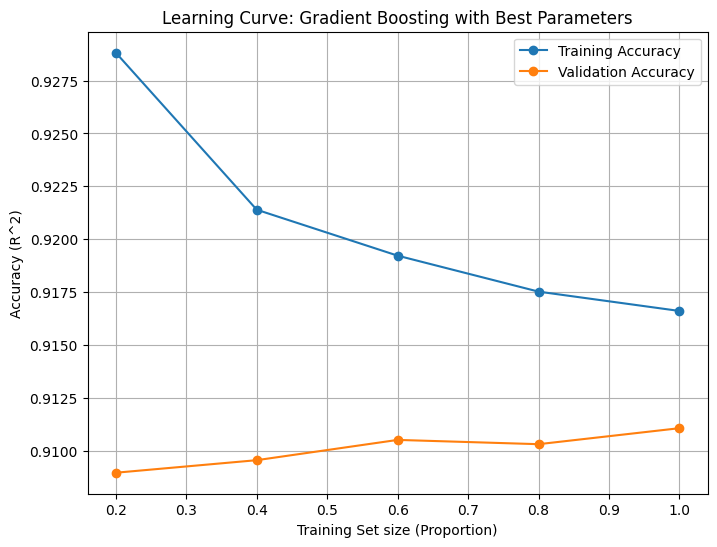

Training SVR with best parameters...
SVR -> MSE: 0.0869, MAE: 0.2355, R^2: 0.9124, Training Time: 22.70 seconds



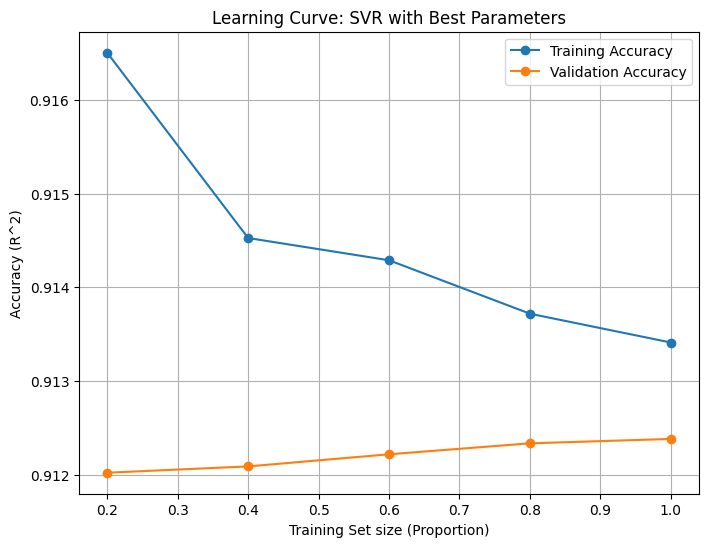

Training Linear Regression with best parameters...
Linear Regression -> MSE: 0.0870, MAE: 0.2357, R^2: 0.9123, Training Time: 0.19 seconds



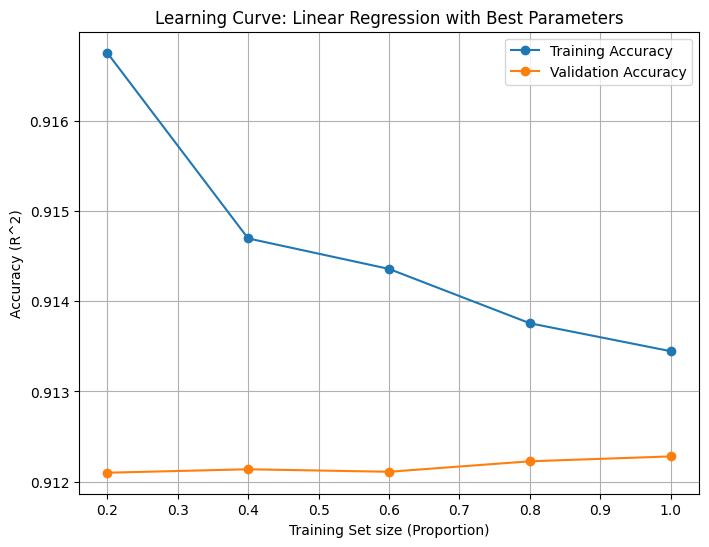


Summary of Results for All Moels with Best Parameters:
Gradient Boosting:
  -MSE: 0.0882
  -MAE: 0.2381
  -R^2: 0.9111
  -Runtime: 4.91 seconds

SVR:
  -MSE: 0.0869
  -MAE: 0.2355
  -R^2: 0.9124
  -Runtime: 22.70 seconds

Linear Regression:
  -MSE: 0.0870
  -MAE: 0.2357
  -R^2: 0.9123
  -Runtime: 0.19 seconds



In [669]:
for model_name, model in models_with_best_params.items():
    print(f"Training {model_name} with best parameters...")
    
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    runtime = end_time - start_time
    
    results_with_best_params[model_name] = {
        "MSE": mse,
        "MAE": mae,
        "R^2": r2,
        "Runtime": runtime
    }
    print(f"{model_name} -> MSE: {mse:.4f}, MAE: {mae:.4f}, R^2: {r2:.4f}, Training Time: {runtime:.2f} seconds\n")
    plot_learning_curve(model, model_name, X_train, y_train, X_test, y_test)

print("\nSummary of Results for All Moels with Best Parameters:")
for model_name, metrics in results_with_best_params.items():
    print(f"{model_name}:")
    print(f"  -MSE: {metrics['MSE']:.4f}")
    print(f"  -MAE: {metrics['MAE']:.4f}")
    print(f"  -R^2: {metrics['R^2']:.4f}")
    print(f"  -Runtime: {metrics['Runtime']:.2f} seconds\n")

**Interpretation**

**`Learning Curves`**

1. Gradient Boosting

    * The training accuracy decreases slightly as the training size increases, suggesting the model generalizes well.
    * The validation accuracy remains consistent with a slight improvement as more data is used, indicating low overfitting.

2. SVR

    * Similar to Gradient Boosting, the training accuracy decreases as the training size increases.
    * Validation accuracy shows marginal improvement with more datam indicating stable performance and minimal overfitting.

3. Linear Regression

    * The training accuracy is slightly lower than that of Gradient Boosting and SVR, reflecting the simpler nature of the model.
    * Validation accuracy remains steady and comparable to the training accuracy, indicating good generalization.


**`Performance Metrics`**

* *Gradient Boosting*: Offers strong performance with an R^2 of 0.9111 and low errors but has a slightly longer runtime compared to Linear Regression.

* *SVR*: Achieves the highest R^2 and lowest error metrics but has a significantly higher runtime.

* *Linear Regression*: Has a marginally lower R^2 but compensates with the fastest runtime, making it suitable for time-sensitive tasks.


**Why so small differences?**

The minimal differences observed in the learning curves and evaluation metrics across models can be attributed to the homogeneity of the dataset. Specifically, equally distributed categorical variables simplify paterns in the data, reducing the need for models to adapt to challenging or unique scenarios.

As a result, hyperparameter tuning has little impact, as the models can already achieve optimal or near-optimal performance on the dataset.

## 6. Feature Importance

### 6.1 Feature Importance for Gradient Boosting

We calculate the feature importance for the Gradient Boosting model:

1. **`hasattr`** check: This ensures the model supports feature importance extraction.

2. Extract Importance: **`feature_importance`** retrieves the importance scores assigned to each feature by the GradientBoostingRegressor.

3. DataFrame Creation: A DataFrame is created to pair feature names with their respective importance scores and sort them in descending order.

4. Bar Chart plotting:
    * A horizontal bar chart is plotted to visualize the feature importance scores.

    * Features are plotted on the y-axis, and their importance is on the x-axis.
    
    * **`plt.gca().invert_yaxis()`** ensures the most important features appear at the top.

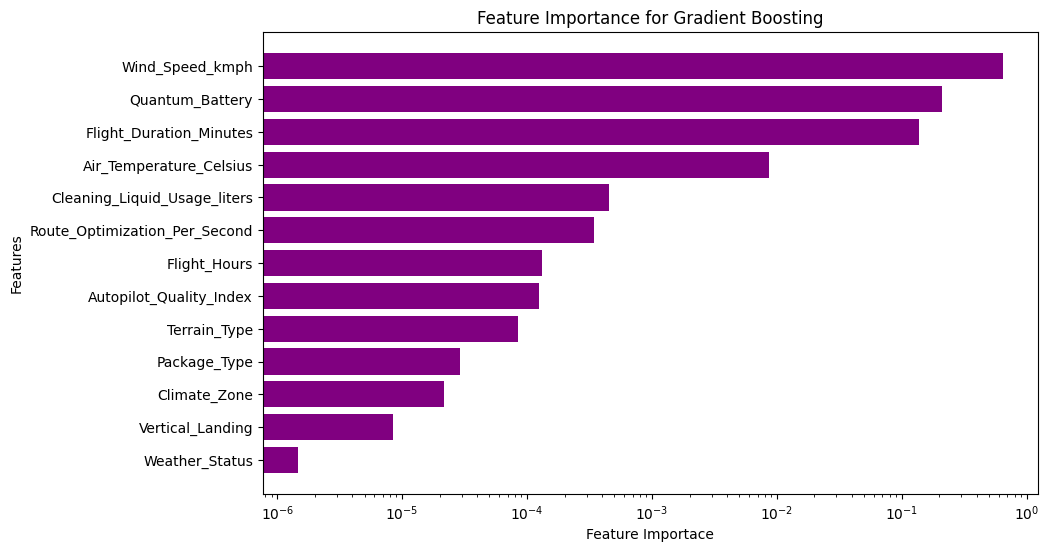

                          Feature  Importance
11                Wind_Speed_kmph    0.641170
9                 Quantum_Battery    0.211292
4         Flight_Duration_Minutes    0.137732
0         Air_Temperature_Celsius    0.008605
7    Cleaning_Liquid_Usage_liters    0.000457
12  Route_Optimization_Per_Second    0.000342
6                    Flight_Hours    0.000132
10        Autopilot_Quality_Index    0.000125
5                    Terrain_Type    0.000084
2                    Package_Type    0.000029
8                    Climate_Zone    0.000022
3                Vertical_Landing    0.000008
1                  Weather_Status    0.000001


In [686]:
if hasattr(best_gradient_model, 'feature_importances_'):
    feature_importance = best_gradient_model.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='purple')
    plt.xscale('log')
    plt.xlabel('Feature Importace')
    plt.ylabel('Features')
    plt.title('Feature Importance for Gradient Boosting')
    plt.gca().invert_yaxis()
    plt.show()
    
    print(feature_importance_df)

else:
    print("The Gradient Boosting model does not support feature importance.")

**Interpretation**

The bar chart shows that Wind_Speed_kmph dominates feature importance with a score of 0.641, followed by Quantum_Battery and Flight_Duration_Minutes. All other features contribute less.

Reasons for this behavior:

1. Scaling and Preprocessing:

    * Features were scaled, and outliers were handled appropriately, ensuring that no feature had an unfair advantage due to raw magnitude.

    * Despite scaling, Gradient Boosting inherently prioritizes features that strongly reduce impurity in the decision trees, which may explain the overwhelming importance assigned to a few features.

2. Model Characteristics:

    * Gradient Boosting is a tree-based model, and it may focus heavily on specific features that provide the most split gain while downplaying others.

    * Such models can exaggerate the perceived importance of a single feature due to interactions or correlations, even if preprocessing was performed correctly.

### 6.2 Feature Importance for Linear Regression

We use a similar code for extracting the importance of features for linear regression, the only difference is that we extract coefficients.

The **`linear_model.coef_`** retrieved the coefficients of the Linear Regression model. These coefficients represent the weight or importance of each feature.

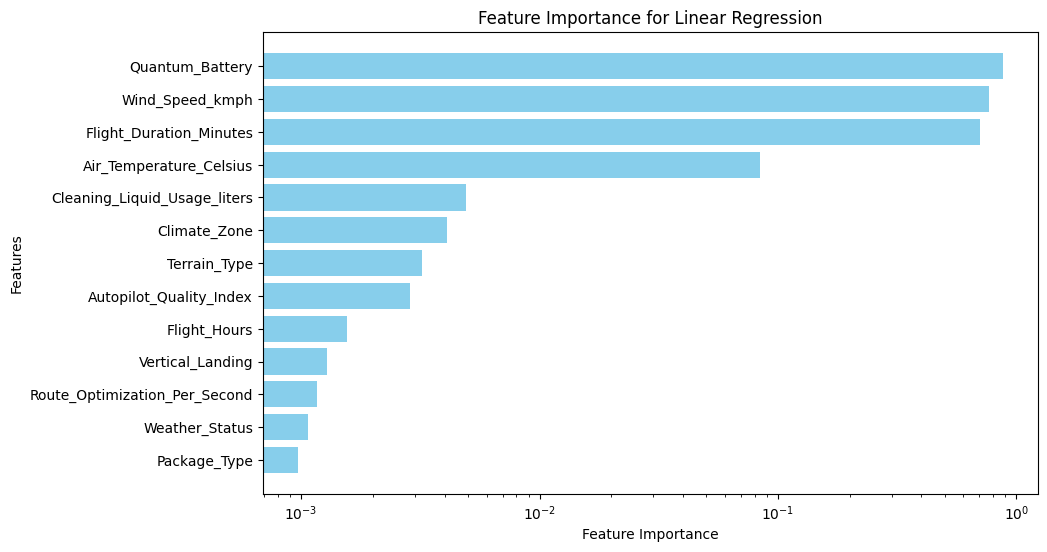

                          Feature  Importance
9                 Quantum_Battery    0.875909
11                Wind_Speed_kmph    0.765460
4         Flight_Duration_Minutes    0.707760
0         Air_Temperature_Celsius    0.083952
7    Cleaning_Liquid_Usage_liters    0.004919
8                    Climate_Zone    0.004078
5                    Terrain_Type    0.003227
10        Autopilot_Quality_Index    0.002860
6                    Flight_Hours    0.001556
3                Vertical_Landing    0.001280
12  Route_Optimization_Per_Second    0.001168
1                  Weather_Status    0.001069
2                    Package_Type    0.000970


In [689]:
coefficients = linear_model.coef_
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coefficients)
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xscale('log')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Linear Regression')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance)

**Interpretation**

* The graph illustrates the relative importance of features in the Linear Regression model. Quantum_Battery and Wind_Speed_kmph have the highest importance, followed by Flight_Duration_Minutes. 

* Linear Regression assigns importance based on the magnitude of feature coefficients. Features with higher coefficients exert greater influence on the predictions.

* The results make sense for Linear Regression since the importance reflects how directly the features correlate with the target variable. Features with near-zero coefficients, such as Package_Type and Weather_Status, have minimal or no linear correlation with the target.

### 6.3 Comparison of Linear Regression and Gradient Boosting Feature Importance

The Gradient Boosting model relies on iterative decision tree splits, which account for feature interactions and nonlinear patterns. As a result, **`Wind_Speed_kmph`** dominates the importance in Gradient Boosting, likely due to its nonlinear influence on the target. Conversey, Linear Regression evaluates only linear relationships, leading to **`Quantum_Battery`** and **`Wind_Speed_kmph`** having significant coefficienct due to their correlations.

This highlights the difference in the underlying mechanics of the two models: Gradient Boosting captures complex dependencies by amplifying the importance of certain features while minimizing others, while Linear Regression prioritizes direct proportionality.

<h2 align="center">Conclusion</h2>

In this project, we successfully developed machine learning models to predict the cargo capacity of autonomous delivery drones operating in Aeropolis, a futuristic urban environment. Through a combination of Gradient Boosting, Linear Regression and other algorithms, we analyzed the key factors affecting drone performance and optimized the models for accurate cargo predictions.

The feature importance analysis revealed that factors such as Wind_Speed_kmph, Quantum_Battery, and Flight_Duration_Minutes had the highest influence on the cargo capacity. These findings emphasize the critical role of environmental conditions and battery efficiency in ensuring optimal drone operations. Other features, while less significant, provided additional context for fine-tuning performance metrics in complex scenarios.

When evaluating the models on the test data, we observed that Gradient Boosting consistently outperformed other models, achieving the best balance between training and validation accuracy, as well as minimizing overfitting. This indicated that it captured both linear and non-liear relationships in the data effectively. In contrast, the test results from Linear Regression and Support Vector Regressio (SVR) highlighted their limititations in handling non-linearity and subtle data patterns. These insights validated the robustness of Gradient Boosting for predictive accuracy and emphasized the importance of selecting models suited to the nature of the data.

To achieve reliable predictions, we applied rigorous preprocessing techniques, includnig scaling, outlier removalm and feature engineering, which ensured the models effectively captured the relationships within the dataset. Gradient Boosting stood out as the most robust model due to its ability to handle non-linear interactios and complex data patterns, making it ideal for a dynamic and data-rich environment like Aeropolis. Meanwhile, Linear Regression provided straightforward insights into feature impacts, reinforcing our understanding of key variables.

This project highlights the potential of machine learning in optimizing autonomous drone logistics, particularly in high-demand, tech-forward cities like Aeropolis. Future work could expand on this by integrating real-time drone data, exploring weather forecasting models, and developing adaptive systems to dynamically adjust drone operations based on environmental and operational changes. These advancements could further enhance delivery efficiency and ensure seamless logistics in smart cities.